### Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.style as style
import warnings
warnings.filterwarnings('ignore')

### SOURCE DATA
https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx

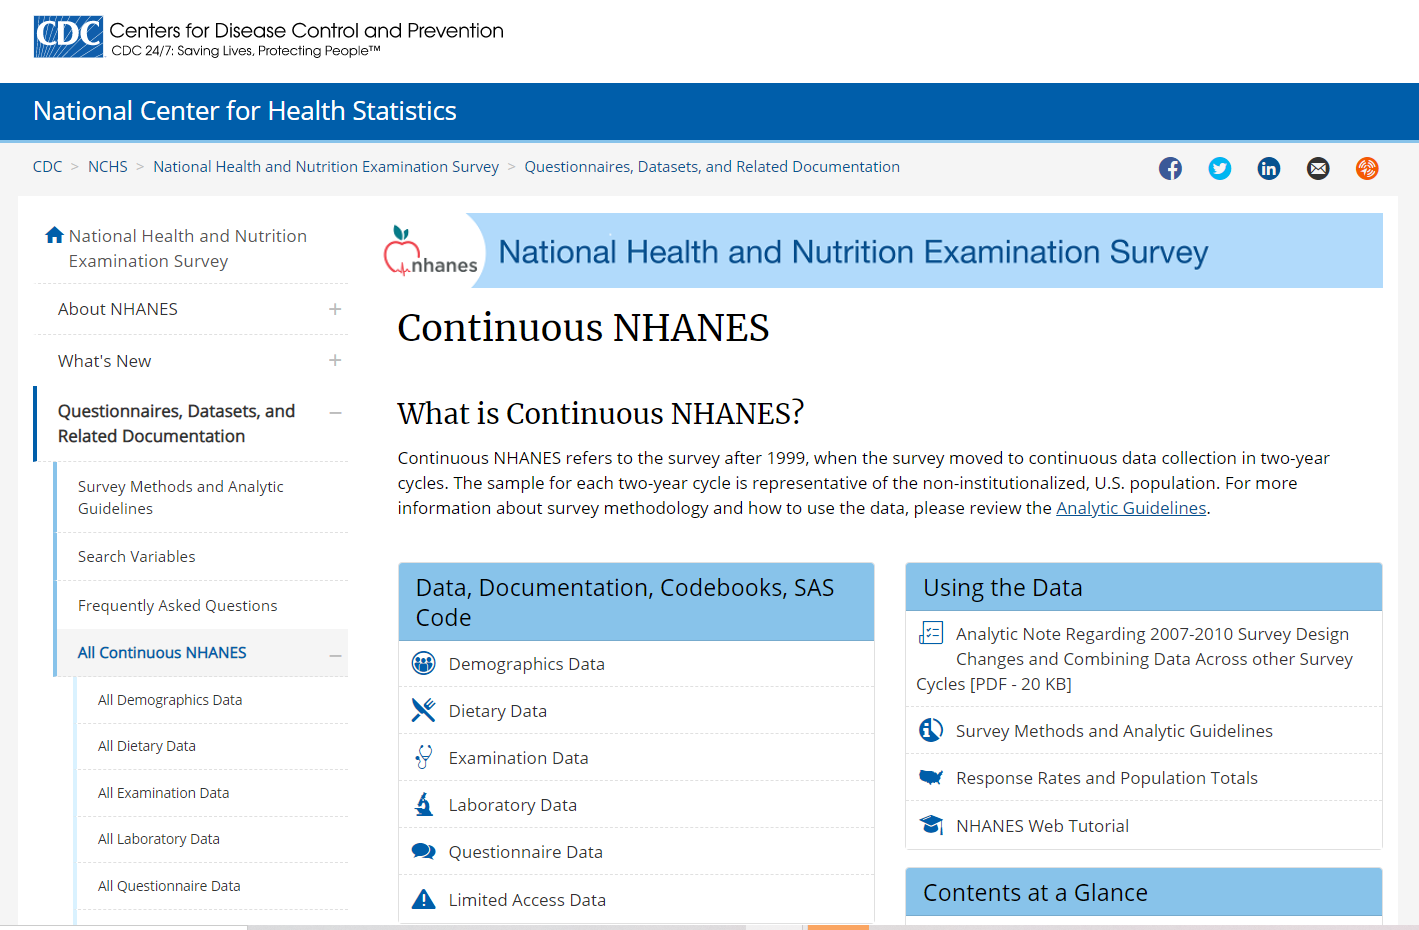

National Health and Nutrition Examination Surveys 2017 - 2018:
- Target Population : noninstitutionalized civilian resident population of the United States. 
- Obejctive : estimates of health status indicators for these population subgroups.
- Data :
    - Demographic Data
    - Examination Data
        - Blood Pressure
        - Body Measure
        - Dual-Energy X-ray Absorptiometry - Whole Body (%Fat)
    - Laboratory Data
        - Albumin 
        - Cholesterol
        - Ferritin
        - Glycohemoglobin 
        - Iron status
        - Plasma Fasting Glucose
        - Urine Pregnancy Test
        - BIOPRO
    - Questioner Data
        - Blood Pressure & Cholesterol
        - Diabetes
        - Medical Condition
        - Smoking

### Objective Model
1. Classification 
    - risk diabetic and 
    - not risk diabetic
2. Classification 
     - prediabetic/undiagnose diabetic
     - not diabetic

### Target
    1. Diabetes
    2. Prediabets/Undiagnose Diabetes
    3. Not Diabetes
   
To determine target, use data:
    - Questioner Data
        > Diabetes
            - diabetes
            - prediabetes
            - risk diabetes
            - feel risk diabetes
    - Laboratory Data
        > Glycohemoglobin
        > Plasma Fasting Glucose

#### Questioner Data Diabetes

In [2]:
Diabetes = pd.read_excel("Diabetes.xlsx")
Diabetes = Diabetes.rename(columns={
                    'SEQN':'id',
                    'DIQ010':'diabet',
                    'DIQ160':'prediabet',
                    'DIQ170' :'risk_diabet',
                    'DIQ172' :'feel_risk_diabet',
                    'DIQ175A' :'familiy_diabet',
                    'DIQ175B' :'overweight',
                    'DIQ175H':'hb_pressure',
                    'DIQ050':'take_insulin',
                    'DIQ070' :'take_diabetic_pills',
                   })

# Doctor told you have diabetes (no_missing value)
# 1 -> Yes
# 2 -> No
# 3 -> Boderline -> Prediabet
# 9 -> Don'Know
#Diabetes.diabet.value_counts()
Diabetes.diabet = np.where((Diabetes.diabet == 1), 'diabet', Diabetes.diabet)
Diabetes.diabet = np.where((Diabetes.diabet == '2'), 'not_diabet', Diabetes.diabet)
Diabetes.diabet = np.where((Diabetes.diabet == '3'), 'prediabet', Diabetes.diabet)
Diabetes.diabet = np.where((Diabetes.diabet == '9'), np.nan, Diabetes.diabet)

# Doctor told you have prediabetes (no_missing value)
# 1 -> Yes
# 2 -> No
# 9 -> Don'Know
#Diabetes.prediabet.value_counts()
Diabetes.prediabet = np.where((Diabetes.prediabet == 1), 'prediabet', Diabetes.prediabet)
Diabetes.prediabet = np.where((Diabetes.prediabet == '2.0'), 'not_diabet', Diabetes.prediabet)
Diabetes.prediabet = np.where((Diabetes.prediabet == '9.0'), np.nan, Diabetes.prediabet)

#Ever told have health risk for diabetes (missing value -> 3021)
# 1 -> Yes
# 2 -> No
# 9 -> Don'Know
#Diabetes.risk_diabet.value_counts()
Diabetes.risk_diabet = np.where((Diabetes.risk_diabet == 1), 'risk', Diabetes.risk_diabet)
Diabetes.risk_diabet = np.where((Diabetes.risk_diabet == '2.0'), 'no', Diabetes.risk_diabet)
Diabetes.risk_diabet = np.where((Diabetes.risk_diabet == '9.0'), np.nan, Diabetes.risk_diabet)

#Feel could be at risk for diabetes (missing value -> 3021)
# 1 -> Yes
# 2 -> No
# 7 -> Refused
# 9 -> Don'Know
#Diabetes.fell_risk_diabet.value_counts()
Diabetes.feel_risk_diabet = np.where((Diabetes.feel_risk_diabet == 1), 'feel_risk', Diabetes.feel_risk_diabet)
Diabetes.feel_risk_diabet = np.where((Diabetes.feel_risk_diabet=='2.0'), 'no', Diabetes.feel_risk_diabet)
Diabetes.feel_risk_diabet = np.where((Diabetes.feel_risk_diabet=='7.0'), 'no', Diabetes.feel_risk_diabet)
Diabetes.feel_risk_diabet = np.where((Diabetes.feel_risk_diabet=='9.0'), np.nan, Diabetes.feel_risk_diabet)

#Family history diabetes (missing value -> 7752)
# 10 -> Yes
# 99 -> Don'Know
#Diabetes.familiy_diabet.value_counts()
Diabetes.familiy_diabet = np.where((Diabetes.familiy_diabet == 10), 'yes', Diabetes.familiy_diabet)
Diabetes.familiy_diabet = np.where((Diabetes.familiy_diabet == '99.0'), np.nan , Diabetes.familiy_diabet)

# overweight (missing value -> 8240)
# 11 -> Yes
#Diabetes.overweight.value_counts()
Diabetes.overweight = Diabetes.overweight.apply(lambda x: 'yes' if x==11 else x)

# High blood pressure (missing value -> 8606)
# 17 -> Yes
#Diabetes.hb_pressure.value_counts()
Diabetes.hb_pressure = Diabetes.hb_pressure.apply(lambda x: 'yes' if x==17 else x)

Diabetes.head()

id      diabet   prediabet risk_diabet feel_risk_diabet familiy_diabet  \
0  93703  not_diabet         nan         nan              nan            nan   
1  93704  not_diabet         nan         nan              nan            nan   
2  93705  not_diabet  not_diabet          no               no            nan   
3  93706  not_diabet  not_diabet          no               no            nan   
4  93707  not_diabet  not_diabet          no               no            nan   

  overweight hb_pressure  take_insulin  take_diabetic_pills  
0        NaN         NaN             2                  NaN  
1        NaN         NaN             2                  NaN  
2        NaN         NaN             2                  NaN  
3        NaN         NaN             2                  NaN  
4        NaN         NaN             2                  NaN

In [3]:
Diabetes[(Diabetes.prediabet == 'prediabet') & (Diabetes.diabet == 'yes')]

Empty DataFrame
Columns: [id, diabet, prediabet, risk_diabet, feel_risk_diabet, familiy_diabet, overweight, hb_pressure, take_insulin, take_diabetic_pills]
Index: []

In [4]:
Diabetes[(Diabetes.risk_diabet == 'risk') & (Diabetes.diabet == 'yes')]

Empty DataFrame
Columns: [id, diabet, prediabet, risk_diabet, feel_risk_diabet, familiy_diabet, overweight, hb_pressure, take_insulin, take_diabetic_pills]
Index: []

In [5]:
Diabetes[(Diabetes['feel_risk_diabet']=='feel_risk') & (Diabetes.diabet == 'yes')]

Empty DataFrame
Columns: [id, diabet, prediabet, risk_diabet, feel_risk_diabet, familiy_diabet, overweight, hb_pressure, take_insulin, take_diabetic_pills]
Index: []

### Add column status diabetes -> stat_diabet (questioner)
diabet; prediabet; risk_diabet, feel_risk_diabet

In [6]:
Diabetes['stat_diabet'] = Diabetes.diabet

### Replace kolom stat_diabet 'no' -> value from column prediabet, risk diabet, fell risk diabet
Diabetes.stat_diabet.loc[(Diabetes.prediabet == 'prediabet') & (Diabetes.stat_diabet == 'not_diabet')] = 'prediabet'
Diabetes.stat_diabet.loc[(Diabetes.risk_diabet == 'risk') & (Diabetes.stat_diabet == 'not_diabet')] = 'risk'
Diabetes.stat_diabet.loc[(Diabetes['feel_risk_diabet']=='feel_risk') & (Diabetes.stat_diabet == 'not_diabet')] = 'feel_risk'   

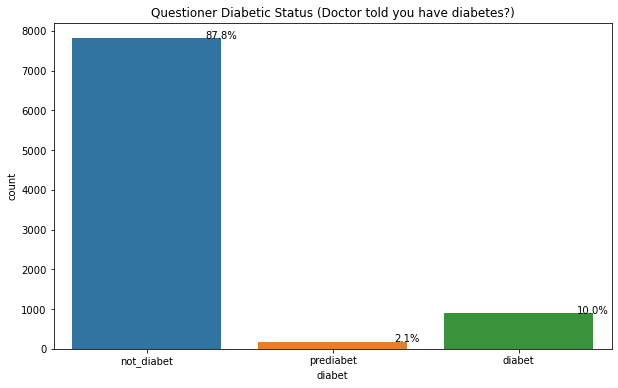

not_diabet    7816
diabet         893
prediabet      184
Name: diabet, dtype: int64

In [7]:
# Questioner
# Doctor told you have diabetes?
plt.figure(figsize=(10,6))
total = float(len(Diabetes['diabet']))
ax = sns.countplot(x='diabet', data=Diabetes)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
plt.title('Questioner Diabetic Status (Doctor told you have diabetes?)')
plt.show()
Diabetes.diabet.value_counts()

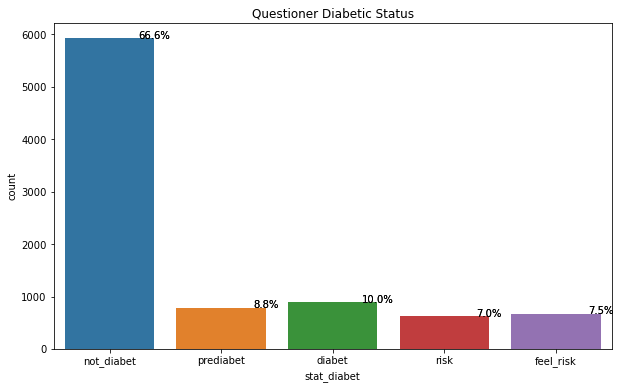

not_diabet    5925
diabet         893
prediabet      780
feel_risk      670
risk           625
Name: stat_diabet, dtype: int64

In [8]:
# Column stat_diabet

# Doctor told you have diabetes ?
# Doctor told you have prediabetes?
# Ever told have health risk for diabetes?
# Feel could be at risk for diabetes ?

plt.figure(figsize=(10,6))
sns.countplot(x='stat_diabet', data=Diabetes)
total = float(len(Diabetes['stat_diabet']))
ax = sns.countplot(x='stat_diabet', data=Diabetes)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
plt.title('Questioner Diabetic Status')
plt.show()
Diabetes.stat_diabet.value_counts()

#### Check column stat_diabet (risk,prediabet) from column take_insulin & take_diabetic_pils

In [9]:
# Take_insulin
# 1 -> Yes
# 2 -> No
# 9 -> Don'Know
Diabetes.take_insulin.value_counts()

2    8642
1     254
9       1
Name: take_insulin, dtype: int64

In [10]:
Diabetes[(Diabetes['take_insulin']==1) & (Diabetes.stat_diabet == 'risk')]

id      diabet   prediabet risk_diabet feel_risk_diabet  \
2209  96002  not_diabet  not_diabet        risk        feel_risk   

     familiy_diabet overweight hb_pressure  take_insulin  take_diabetic_pills  \
2209            yes        yes         NaN             1                  NaN   

     stat_diabet  
2209        risk

In [11]:
Diabetes[(Diabetes['take_insulin']==1) & (Diabetes.stat_diabet == 'prediabet')]

id      diabet  prediabet risk_diabet feel_risk_diabet  \
6424  100386  not_diabet  prediabet        risk        feel_risk   
7447  101449  not_diabet  prediabet        risk        feel_risk   
8474  102517  not_diabet  prediabet          no        feel_risk   

     familiy_diabet overweight hb_pressure  take_insulin  take_diabetic_pills  \
6424            yes        yes         NaN             1                  2.0   
7447            yes        yes         NaN             1                  1.0   
8474            nan        yes         NaN             1                  1.0   

     stat_diabet  
6424   prediabet  
7447   prediabet  
8474   prediabet

In [12]:
Diabetes[(Diabetes['take_insulin']==1) & (Diabetes.stat_diabet == 'risk')]

id      diabet   prediabet risk_diabet feel_risk_diabet  \
2209  96002  not_diabet  not_diabet        risk        feel_risk   

     familiy_diabet overweight hb_pressure  take_insulin  take_diabetic_pills  \
2209            yes        yes         NaN             1                  NaN   

     stat_diabet  
2209        risk

In [13]:
Diabetes[(Diabetes['take_diabetic_pills']==1) & (Diabetes.stat_diabet == 'prediabet')]

id      diabet  prediabet risk_diabet feel_risk_diabet  \
49     93754  not_diabet  prediabet          no               no   
239    93949   prediabet        nan        risk        feel_risk   
249    93960  not_diabet  prediabet          no        feel_risk   
323    94038   prediabet        nan        risk        feel_risk   
367    94084   prediabet        nan          no               no   
...      ...         ...        ...         ...              ...   
8739  102791  not_diabet  prediabet          no        feel_risk   
8807  102863  not_diabet  prediabet        risk        feel_risk   
8827  102883   prediabet        nan          no        feel_risk   
8845  102901   prediabet        nan        risk               no   
8892  102952   prediabet        nan          no               no   

     familiy_diabet overweight hb_pressure  take_insulin  take_diabetic_pills  \
49              nan        NaN         NaN             2                  1.0   
239             yes        NaN         NaN             2                  1.0   
249             nan        yes         NaN             2                  1.0   
323             yes        NaN         yes             2                  1.0   
367             nan        NaN         NaN             2                  1.0   
...             ...        ...         ...           ...                  ...   
8739            nan        NaN         yes             2                  1.0   
8807            nan        NaN         NaN             2                  1.0   
8827            nan        NaN         NaN             2                  1.0   
8845            nan        NaN         NaN             2                  1.0   
8892            nan        NaN         NaN             2                  1.0   

     stat_diabet  
49     prediabet  
239    prediabet  
249    prediabet  
323    prediabet  
367    prediabet  
...          ...  
8739   prediabet  
8807   prediabet  
8827   prediabet  
8845   prediabet  
8892   prediabet  

[71 rows x 11 columns]

Prediabet -> take diabetic pills for prevent type 2 diabetes

In [14]:
#Drop column prediabet, risk_diabet, fell_risk_diabet, take_insulin , retinopathy, take_diabetic_pills
Diabetes.drop(['prediabet', 'risk_diabet', 'feel_risk_diabet','take_insulin','take_diabetic_pills','diabet'], axis=1, inplace=True)

In [15]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8897 entries, 0 to 8896
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              8897 non-null   int64 
 1   familiy_diabet  8895 non-null   object
 2   overweight      657 non-null    object
 3   hb_pressure     291 non-null    object
 4   stat_diabet     8893 non-null   object
dtypes: int64(1), object(4)
memory usage: 347.7+ KB


#### Fill missing value, no, feel risk & risk (stat_diabet) with laboratory data (Fasting_Glucose)-> diabetic column

In [16]:
Fasting_Glucose = pd.read_excel("Fasting_Glucose.xlsx")
Fasting_Glucose = Fasting_Glucose.rename(columns={
                    'SEQN':'id',
                    'LBXGLU':'fasting_glucose_mg/dL',
})
df = pd.merge(Diabetes,Fasting_Glucose, on='id', how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8897 entries, 0 to 8896
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     8897 non-null   int64  
 1   familiy_diabet         8895 non-null   object 
 2   overweight             657 non-null    object 
 3   hb_pressure            291 non-null    object 
 4   stat_diabet            8893 non-null   object 
 5   fasting_glucose_mg/dL  2891 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 486.6+ KB


#### Category diabetic columns
- Diabetic
    - Answered “yes”, “Have you been told by a doctor that you have diabetes?” and had a Plasma Glucose ≥ 126 mg/dl
    - Nan values and had a Plasma Glucose ≥ 126 mg/dl 
- Undiagnose Diabetic
    - Answered “no”, “Have you been told by a doctor that you have diabetes?” but had a Plasma Glucose ≥ 126 mg/dl
    - Answered "yes", "Ever told have health risk for diabetes?" but had a Plasma Glucose ≥ 126 mg/dl
    - Answered "yes", "Feel could be at risk for diabetes?" but had a Plasma Glucose ≥ 126 mg/dl
    - Nan values and had a Plasma Glucose ≥ 126 mg/dl 
- Prediabetic
    - Answered "yes", "Doctor told you have prediabetes?" and had a Plasma Glucose between 100 − 125 mg/dl
    - Answered "yes", "Ever told have health risk for diabetes?" but had a Plasma Glucose between 100 − 125 mg/dl
    - Answered "yes", "Feel could be at risk for diabetes?" but had a Plasma Glucose between 100 − 125 mg/dl
    - Nan values and had a Plasma Glucose between 100 − 125 mg/dl
- Not Diabetic
    - Answered “no”, “Have you been told by a doctor that you have diabetes?” 
    - Nan values and had a Plasma Glucose ≤ 100 mg/dl 

<AxesSubplot:xlabel='fasting_glucose_mg/dL'>

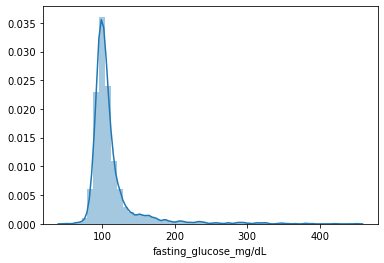

In [17]:
sns.distplot(df['fasting_glucose_mg/dL'])

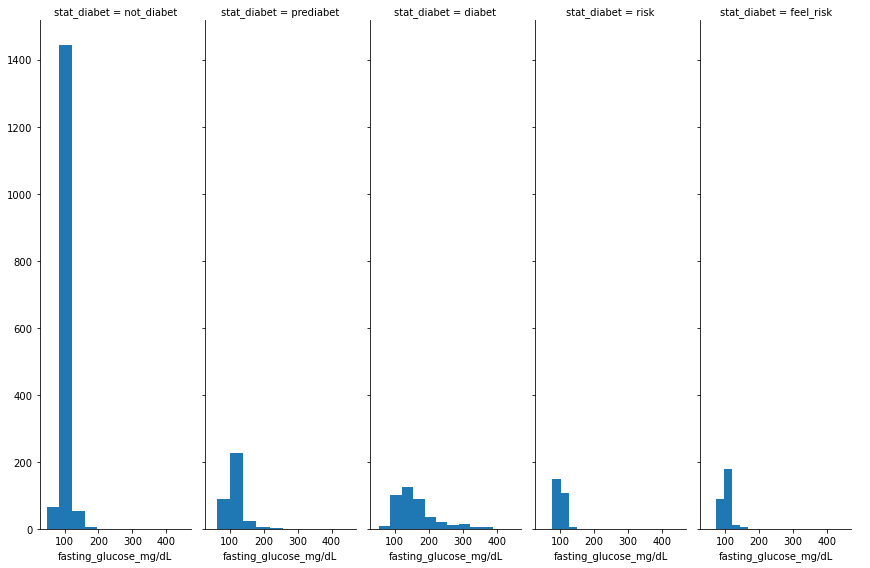

In [18]:
grid = sns.FacetGrid(data=df,col='stat_diabet', height=8,aspect=0.3,)
grid.map(plt.hist,'fasting_glucose_mg/dL').add_legend()
plt.show()

In [19]:
df[(df['fasting_glucose_mg/dL']>125) & (df['stat_diabet'].isnull())]

Empty DataFrame
Columns: [id, familiy_diabet, overweight, hb_pressure, stat_diabet, fasting_glucose_mg/dL]
Index: []

In [20]:
df[(df['fasting_glucose_mg/dL']<=125)&(df['fasting_glucose_mg/dL']>100)&(df['stat_diabet'].isnull())]

Empty DataFrame
Columns: [id, familiy_diabet, overweight, hb_pressure, stat_diabet, fasting_glucose_mg/dL]
Index: []

In [21]:
df['diabetic'] = df.stat_diabet

# undiagnose diabet -> stat_diabet=no
df.diabetic.loc[(df['fasting_glucose_mg/dL']>125) & (df['diabetic']=='not_diabet')] = 'undiag_diabet'
# undiagnose diabet -> stat_diabet=feel_risk
df.diabetic.loc[(df['fasting_glucose_mg/dL']>125) & (df['diabetic']=='feel_risk')] = 'undiag_diabet'
# undiagnose diabet -> stat_diabet=risk
df.diabetic.loc[(df['fasting_glucose_mg/dL']>125) & (df['diabetic']=='risk')] = 'undiag_diabet'
# undiagnose diabet -> stat_diabet=prediabet
df.diabetic.loc[(df['fasting_glucose_mg/dL']>125) & (df['diabetic']=='prediabet')] = 'undiag_diabet'

# prediabet -> stat_diabet=no
df.diabetic.loc[(df['fasting_glucose_mg/dL']<=125)&(df['fasting_glucose_mg/dL']>100)&(df['diabetic']=='not_diabet')] = 'prediabet'
# prediabet -> fasting glucose >=125 & <100
df.diabetic.loc[(df['fasting_glucose_mg/dL']<=125)&(df['fasting_glucose_mg/dL']>100) & (df['diabetic']=='feel_risk')] = 'prediabet'
# prediabet -> stat_diabet=risk
df.diabetic.loc[(df['fasting_glucose_mg/dL']<=125)&(df['fasting_glucose_mg/dL']>100) & (df['diabetic']=='risk')] = 'prediabet'

# isnull -> stat_diabet=no
df.diabetic.loc[(df['fasting_glucose_mg/dL']<=100) & (df['diabetic'].isnull())] = 'not_diabet'

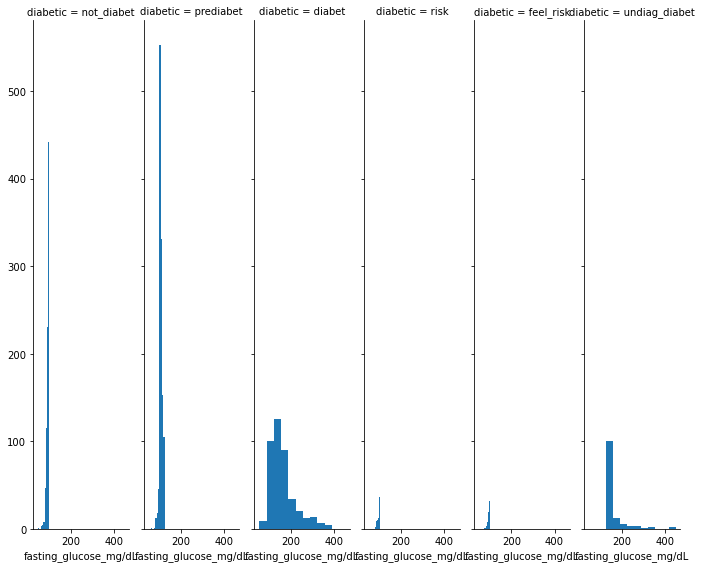

In [22]:
grid = sns.FacetGrid(data=df,col='diabetic', height=8,aspect=0.2,)
grid.map(plt.hist,'fasting_glucose_mg/dL').add_legend()
plt.show()

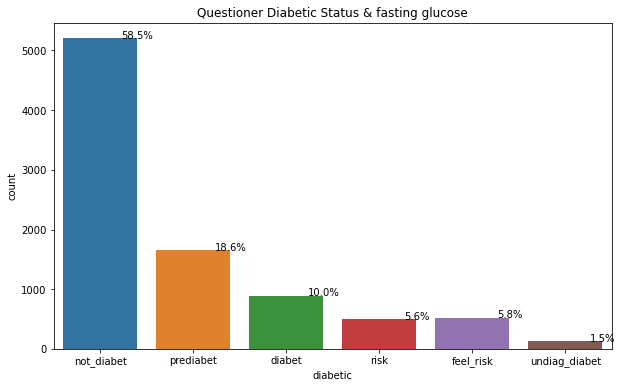

not_diabet       5204
prediabet        1651
diabet            893
feel_risk         519
risk              498
undiag_diabet     130
Name: diabetic, dtype: int64

In [23]:
### Column diabetic -> questioner & fasting glucose
plt.figure(figsize=(10,6))
total = float(len(df['diabetic']))
ax = sns.countplot(x='diabetic', data=df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
plt.title('Questioner Diabetic Status & fasting glucose')
plt.show()
df.diabetic.value_counts()

#### Fill missing value, feel risk & risk (diabetic)  with glycohemoglobin -> diabetic_stat

In [24]:
Glycohemoglobin = pd.read_excel("Glycohemoglobin.xlsx")
Glycohemoglobin = Glycohemoglobin.rename(columns={
                    'SEQN':'id',
                    'LBXGH':'glyco_hemo_%', 
                   })
df = pd.merge(df, Glycohemoglobin, on='id', how='outer')

<AxesSubplot:xlabel='glyco_hemo_%'>

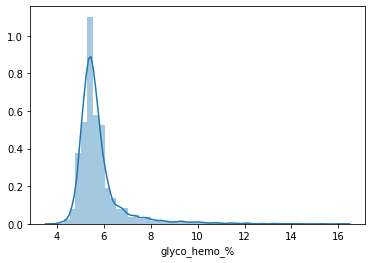

In [25]:
sns.distplot(df['glyco_hemo_%'])

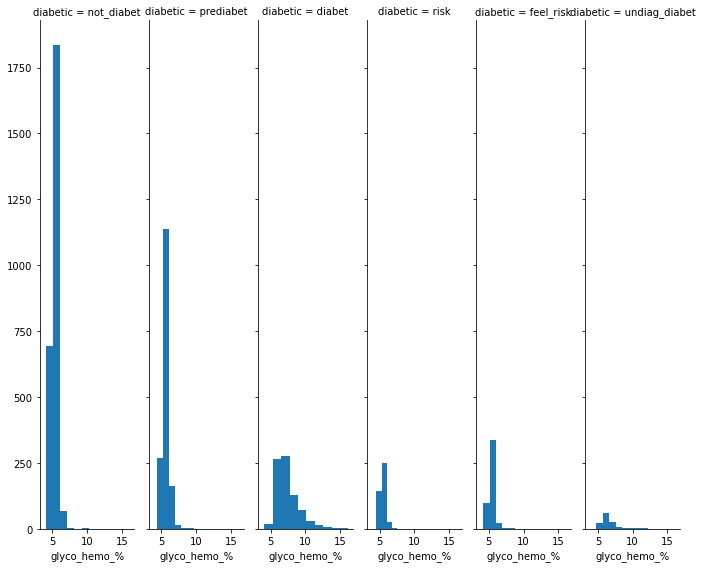

In [26]:
grid = sns.FacetGrid(data=df,col='diabetic', height=8,aspect=0.2,)
grid.map(plt.hist,'glyco_hemo_%').add_legend()
plt.show()

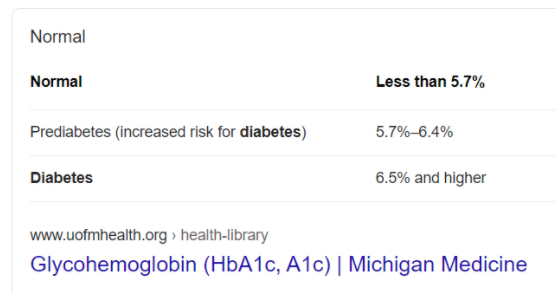

#### CATEGORY DIABETIC STAT column
- diabetes
    - Answered “yes”, “Have you been told by a doctor that you have diabetes?” and had Plasma Glucose ≥ 126 mg/dl 
    - Answered “yes”, “Have you been told by a doctor that you have diabetes?” and had Glycohemoglobin ≥ 6.5%  
    
- undiagnose diabetes
    - Answered “no”, “Have you been told by a doctor that you have diabetes?” but had a Plasma Glucose ≥ 126 mg/dl or had a Glycohemoglobin ≥ 6.5%
    - Answered "yes", "Ever told have health risk for diabetes?" but had a Plasma Glucose ≥ 126 mg/dl or had a Glycohemoglobin ≥ 6.5%
    - Answered "yes", "Feel could be at risk for diabetes?" but had a Plasma Glucose ≥ 126 mg/dl or had a Glycohemoglobin ≥ 6.5%
        
- prediabetes
    - Answered "yes", "Doctor told you have prediabetes?" or had a Plasma Glucose between 100 − 125 mg/dl or had a Glycohemoglobin between 5.7% - 6.4%
    - Answered “no”, “Have you been told by a doctor that you have diabetes?” but had a Plasma Glucose between 100 − 125 mg/dl or had a Glycohemoglobin between 5.7% - 6.4%
    -  Answered "yes", "Ever told have health risk for diabetes?" but had a Plasma Glucose between 100 − 125 mg/dl or had a Glycohemoglobin between 5.7% - 6.4%
    - Answered "yes", "Feel could be at risk for diabetes?" but had a Plasma Glucose between 100 − 125 mg/dl or had a Glycohemoglobin between 5.7% - 6.4%
    
- no diabetes
    - Answered “no”, “Have you been told by a doctor that you have diabetes?” or ad a Plasma Glucose ≤ 100 mg/dl or had a Glycohemoglobin < 5.7%

In [27]:
df['diabetic_stat'] = df['diabetic']

# isnull -> diabetic_stat=no
df.diabetic_stat.loc[(df['glyco_hemo_%']<5.7) & (df['diabetic_stat'].isnull())] = 'not_diabet'

# isnull -> diabetic_stat=no
df.diabetic_stat.loc[(df['glyco_hemo_%']<6.5)& (df['glyco_hemo_%']>=5.7) & (df['diabetic_stat'].isnull())] = 'prediabet'

# feel risk : glyco_hemo_%<5.7 & fasting_glucose_mg/dL<=100 -> no
df.diabetic_stat.loc[(df['glyco_hemo_%']<5.7) & (df['fasting_glucose_mg/dL']<=100) & (df['diabetic_stat']=='feel_risk')] = 'not_diabet'

# feel risk : glyco_hemo_%<5.7 & fasting_glucose nan -> no
df.diabetic_stat.loc[(df['glyco_hemo_%']<5.7) & (df['fasting_glucose_mg/dL'].isnull()) & (df['diabetic_stat']=='feel_risk')] = 'not_diabet'

# feel risk : glyco_hemo nan & fasting_glucose_mg/dL<=100 -> no
df.diabetic_stat.loc[(df['glyco_hemo_%'].isnull()) & (df['fasting_glucose_mg/dL']<=100) & (df['diabetic_stat']=='feel_risk')] = 'not_diabet'

# feel risk : glyco_hemo normal & fasting_glucose prediabet -> prediabet
df.diabetic_stat.loc[(df['glyco_hemo_%']<5.7) & (df['fasting_glucose_mg/dL']<=125)& (df['fasting_glucose_mg/dL']> 100) & (df['diabetic_stat']=='feel_risk')] = 'prediabet'

# feel risk : glyco_hemo normal & fasting_glucose prediabet -> prediabet
df.diabetic_stat.loc[(df['glyco_hemo_%']>=5.7) & (df['glyco_hemo_%']<6.5) & (df['fasting_glucose_mg/dL']<= 100) & (df['diabetic_stat']=='feel_risk')] = 'prediabet'

# feel risk : glyco_hemo normal & fasting_glucose prediabet -> prediabet
df.diabetic_stat.loc[(df['glyco_hemo_%']>=5.7) & (df['glyco_hemo_%']<6.5) & (df['fasting_glucose_mg/dL'].isnull()) & (df['diabetic_stat']=='feel_risk')] = 'prediabet'

# feel risk : glyco_hemo diabet -> undiag diabet
df.diabetic_stat.loc[(df['glyco_hemo_%']>=6.5) & (df['diabetic_stat']=='feel_risk')] = 'undiag_diabet'

#risk : glyco_hemo_%<5.7 & fasting_glucose_mg/dL<=100 -> no
df.diabetic_stat.loc[(df['glyco_hemo_%']<5.7) & (df['fasting_glucose_mg/dL']<=100) & (df['diabetic_stat']=='risk')] = 'not_diabet'

#risk : glyco_hemo_%<5.7 & fasting_glucose_mg/dL<= nan -> no
df.diabetic_stat.loc[(df['glyco_hemo_%']<5.7) & (df['fasting_glucose_mg/dL'].isnull()) & (df['diabetic_stat']=='risk')] = 'not_diabet'

#risk : glyco_hemo_%<5.7 & fasting_glucose_mg/dL<= nan -> undiag diabet
df.diabetic_stat.loc[(df['glyco_hemo_%']>=6.5) & (df['fasting_glucose_mg/dL'].isnull()) & (df['diabetic_stat']=='risk')] = 'undiag_diabet'

#risk : glyco_hemo_% >= 5.7 & <6.5 & fasting_glucose_mg/dL<= nan -> prediabet
df.diabetic_stat.loc[(df['glyco_hemo_%']>=5.7) & (df['glyco_hemo_%']<6.5) & (df['fasting_glucose_mg/dL'].isnull()) & (df['diabetic_stat']=='risk')] = 'prediabet'

#risk : fasting_glucose_mg/dL<= 100 & glyco_hemo_% <6.5 & >=5.7)-> prediabet
df.diabetic_stat.loc[(df['glyco_hemo_%']>=5.7) & (df['glyco_hemo_%']<6.5) & (df['fasting_glucose_mg/dL']<=100) & (df['diabetic_stat']=='risk')] = 'prediabet'

#risk : glyco_hemo >=6.5 & -> undiag diabet
df.diabetic_stat.loc[(df['glyco_hemo_%']>=6.5) & (df['diabetic_stat']=='risk')] = 'undiag_diabet'

# no : glyco_hemo normal & fasting_glucose prediabet -> prediabet
df.diabetic_stat.loc[(df['glyco_hemo_%']<5.7) & (df['fasting_glucose_mg/dL']<=125)& (df['fasting_glucose_mg/dL']> 100) & (df['diabetic_stat']=='not_diabet')] = 'prediabet'

# no : glyco_hemo prediabet & fasting_glucose normal -> prediabet
df.diabetic_stat.loc[(df['glyco_hemo_%']>=5.7) & (df['glyco_hemo_%']<6.5) & (df['fasting_glucose_mg/dL']<= 100) & (df['diabetic_stat']=='not_diabet')] = 'prediabet'

# no : glyco_hemo prediabet & fasting_glucose isnull -> prediabet
df.diabetic_stat.loc[(df['glyco_hemo_%']>=5.7) & (df['glyco_hemo_%']<6.5) & (df['fasting_glucose_mg/dL'].isnull()) & (df['diabetic_stat']=='not_diabet')] = 'prediabet'

# no : glyco_hemo diabet -> undiag diabet
df.diabetic_stat.loc[(df['glyco_hemo_%']>=6.5) & (df['diabetic_stat']=='not_diabet')] = 'undiag_diabet'

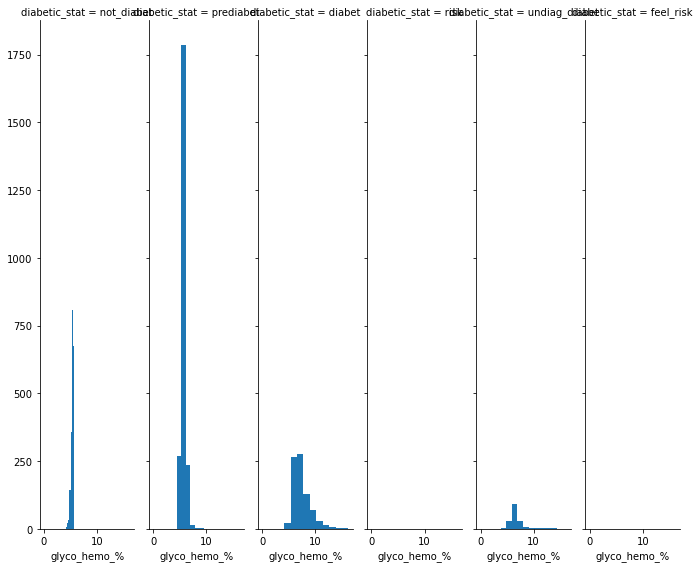

In [28]:
grid = sns.FacetGrid(data=df,col='diabetic_stat', height=8,aspect=0.2,)
grid.map(plt.hist,'glyco_hemo_%').add_legend()
plt.show()

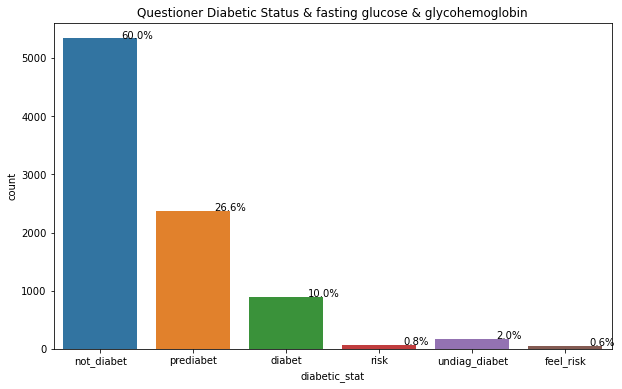

not_diabet       5337
prediabet        2371
diabet            893
undiag_diabet     179
risk               67
feel_risk          50
Name: diabetic_stat, dtype: int64

In [29]:
### Column diabetic stat-> questioner & fasting glucosen & glyco_hemo
plt.figure(figsize=(10,6))
total = float(len(df['diabetic_stat']))
ax = sns.countplot(x='diabetic_stat', data=df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
plt.title('Questioner Diabetic Status & fasting glucose & glycohemoglobin')
plt.show()

df.diabetic_stat.value_counts()

#### CASE Diabet (visualization)
- not_diabetic (no, feel_risk, risk) -> 61.4%
- prediabet/undiag_diabet -> 28.6%
- diabetic -> 10 %

In [30]:
df['case_diabet'] = df.diabetic_stat
df['case_diabet'].replace({'feel_risk':'not_diabet','risk':'not_diabet','prediabet':'prediabet','undiag_diabet':'diabet','diabet':'diabet'},inplace=True)
df.case_diabet.value_counts()

not_diabet    5454
prediabet     2371
diabet        1072
Name: case_diabet, dtype: int64

In [31]:
import plotly.express as px
barplot = df['case_diabet'].value_counts()
fig = px.bar(x=barplot.index, y=[barplot.values], 
             color=["lightblue","pink", "lightgreen", ], 
             color_discrete_map="identity",
             labels={"value": "Values",
                     "x": "Risk Diabetes",},
             title="Countplot by Risk Diabetes",
            )

fig.show()

## LABEL ASSIGMENT FOR TARGET 
- CASE1
- CASE2

#### CASE 1 -> screening risk diabetes
- not_diabetic 
- risk_diabetic -> diabet, undiag_diabet, prediabet, risk, feel_risk

In [32]:
df['case1_risk_diabet'] = df.diabetic_stat
df['case1_risk_diabet'].replace({'feel_risk':'risk_diabet','risk':'risk_diabet','prediabet':'risk_diabet','undiag_diabet':'risk_diabet','diabet':'risk_diabet'},inplace=True)
df.case1_risk_diabet.value_counts()

not_diabet     5337
risk_diabet    3560
Name: case1_risk_diabet, dtype: int64

#### CASE 2 -> additional test
- not_diabetic (no, feel_risk, risk)
- prediabet/undiag -> prediabet, undiag_diabet

In [33]:
df['case2_diabet'] = df.diabetic_stat
df['case2_diabet'].replace({'feel_risk':'not_diabet','risk':'not_diabet','prediabet':'prediabet/undiag','undiag_diabet':'prediabet/undiag','diabet':np.nan},inplace=True)
df.case2_diabet.value_counts()

not_diabet          5454
prediabet/undiag    2550
Name: case2_diabet, dtype: int64

In [34]:
df.drop(['diabetic','glyco_hemo_%','fasting_glucose_mg/dL'], axis=1, inplace=True)

### Select Features for target

#### Data Questioner : Medical

A number of research papers have shown associations between gout and type 2 diabetes including a study from Harvard Medical School, published in 2014, which showed gout to be associated with a 70 increased risk of developing type 2 diabetes.

    Source:https://www.diabetes.co.uk/conditions/gout-and-diabetes.html

Acute pancreatitis associated with type 2 diabetes is usually due to gallstones. Acute pancreatitis signs and symptoms include: Upper abdominal pain. Abdominal pain that radiates to your back. Abdominal pain that feels worse after eating.

    Source: https://www.journalofdiabetology.org/article.asp?issn=2078-7685;year=2017;volume=8;issue=2;spage=56;epage=57;
    https://www.mayoclinic.org/diseases-conditions/pancreatitis/symptoms-causes/syc-20360227

Since the thyroid gland plays a central role in the regulation of metabolism, abnormal thyroid function can have a major impact on the control of diabetes. In addition, untreated thyroid disorder can increase the risk of certain diabetic complications and can aggravate many diabetes symptoms.

    Source : https://www.diabetesselfmanagement.com/about-diabetes/general-diabetes-information/thyroid-disorders-and-diabetes/
    
Having one may mean you're more likely to develop the other. In fact, research shows that arthritis raises your risk for diabetes by about 50%. And diabetes raises your risk of having arthritis. Nearly half of American adults who have diabetes also have arthritis.
    
    Source: https://www.webmd.com/rheumatoid-arthritis/rheumatoid-arthritis-complications#:~:text=Having%20one%20may%20mean%20you,have%20diabetes%20also%20have%20arthritis.
    
Almost one-half of patients with chronic bronchitis have coexisting metabolic syndrome and about 20% have diabetes.

    Source:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5513377/#:~:text=Almost%20one%2Dhalf%20of%20patients,has%20been%20reported%20%5B8%5D.


In [35]:
Medical = pd.read_excel("Medical.xlsx")
Medical = Medical.rename(columns={
                    'SEQN':'id',
                    'MCQ080' :'overweight',
                    'MCQ160A' :'arthritis',
                    'MCQ160N' :'gout',
                    'MCQ160M' :'thyroid',
                    'MCQ160K':'chronic_bronchitis',
                    'MCQ520' :'abdominal_pain',
                    'MCQ550':'gallstones',
                    'MCQ080' :'overweight',
                    'MCQ160A' :'arthritis',
                    'MCQ160M' :'thyroid',
                    'MCQ300C' :'relative_diabet',
                   })

# Ever been told you overweight
# 1 -> Yes
# 2 -> No
# 9 -> Dont Know
#Medical.overweight.value_counts()
Medical.overweight = np.where((Medical.overweight == 9) ,np.nan, Medical.overweight)
Medical.overweight = Medical.overweight.apply(lambda x: 'yes' if x==1 else x)
Medical.overweight = Medical.overweight.apply(lambda x: 'no' if x==2 else x)


# Ever been told you have arthritis
# 1 -> Yes
# 2 -> No
# 9 -> Dont Know
#Medical.arthritis.value_counts()
Medical.arthritis = np.where((Medical.arthritis == 9) ,np.nan, Medical.arthritis)
Medical.arthritis = Medical.arthritis.apply(lambda x: 'yes' if x==1 else x)
Medical.arthritis = Medical.arthritis.apply(lambda x: 'no' if x==2 else x)

# Ever been told you have abdominal_pain
# 1 -> Yes
# 2 -> No
# 9 -> Dont Know
#Medical.arthritis.value_counts()
Medical.abdominal_pain = np.where((Medical.abdominal_pain == 9) ,np.nan, Medical.abdominal_pain)
Medical.abdominal_pain = Medical.abdominal_pain.apply(lambda x: 'yes' if x==1 else x)
Medical.abdominal_pain = Medical.abdominal_pain.apply(lambda x: 'no' if x==2 else x)

# Ever been told you have gallstones
# 1 -> Yes
# 2 -> No
# 9 -> Dont Know
#Medical.gallstones.value_counts()
Medical.gallstones = np.where((Medical.gallstones == 9) ,np.nan, Medical.gallstones)
Medical.gallstones = Medical.gallstones.apply(lambda x: 'yes' if x==1 else x)
Medical.gallstones = Medical.gallstones.apply(lambda x: 'no' if x==2 else x)



# Ever been told you have chronic_bronchitis
# 1 -> Yes
# 2 -> No
# 9 -> Dont Know
#Medical.arthritis.value_counts()
Medical.chronic_bronchitis = np.where((Medical.chronic_bronchitis == 9) ,np.nan, Medical.chronic_bronchitis)
Medical.chronic_bronchitis = Medical.chronic_bronchitis.apply(lambda x: 'yes' if x==1 else x)
Medical.chronic_bronchitis = Medical.chronic_bronchitis.apply(lambda x: 'no' if x==2 else x)

# Ever been told you have gout
# 1 -> Yes
# 2 -> No
# 9 -> Dont Know
#Medical.arthritis.value_counts()
Medical.gout = np.where((Medical.gout == 9) ,np.nan, Medical.gout)
Medical.gout = Medical.gout.apply(lambda x: 'yes' if x==1 else x)
Medical.gout = Medical.gout.apply(lambda x: 'no' if x==2 else x) 

# Ever been told you had thyroid problem, missing data=3328 
# 1 -> Yes
# 2 -> No
# 7 -> Refused
# 9 -> Dont Know
#Medical.thyroid.value_counts()
Medical.thyroid = np.where((Medical.thyroid == 9) ,np.nan, Medical.thyroid)
Medical.thyroid = np.where((Medical.thyroid == 7) ,np.nan, Medical.thyroid)
Medical.thyroid = Medical.thyroid.apply(lambda x: 'yes' if x==1 else x)
Medical.thyroid = Medical.thyroid.apply(lambda x: 'no' if x==2 else x)

# Ever been told you had relative_diabet, missing data=3328 
# 1 -> Yes
# 2 -> No
# 7 -> Refused
# 9 -> Dont Know
#Medical.relative_diabet.value_counts()
Medical.relative_diabet = np.where((Medical.relative_diabet == 7) ,np.nan, Medical.relative_diabet)
Medical.relative_diabet = np.where((Medical.relative_diabet == 9) ,np.nan, Medical.relative_diabet)
Medical.relative_diabet = Medical.relative_diabet.apply(lambda x: 'yes' if x==1 else x)
Medical.relative_diabet = Medical.relative_diabet.apply(lambda x: 'no' if x==2 else x)

df = pd.merge(df,Medical, on='id', how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8897 entries, 0 to 8896
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  8897 non-null   int64 
 1   familiy_diabet      8895 non-null   object
 2   overweight_x        657 non-null    object
 3   hb_pressure         291 non-null    object
 4   stat_diabet         8893 non-null   object
 5   diabetic_stat       8897 non-null   object
 6   case_diabet         8897 non-null   object
 7   case1_risk_diabet   8897 non-null   object
 8   case2_diabet        8004 non-null   object
 9   overweight_y        6154 non-null   object
 10  arthritis           5552 non-null   object
 11  gout                5560 non-null   object
 12  thyroid             5554 non-null   object
 13  chronic_bronchitis  5563 non-null   object
 14  abdominal_pain      5564 non-null   object
 15  gallstones          5554 non-null   object
 16  relative_diabet     5487

Increased risk for diabetes is primarily associated with ethnicity, family history of diabetes, and smoking.
    
    Source : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3870323/

#### Merge column family diabet (questioner diabetes) & Relative Diabet (questioner medical) => Diabetic Relative

In [36]:
df['diabetic_relative']=df.relative_diabet

### Column diabetic_relative 'no', replace value from column familiy_diabet 'yes' -> yes
df.diabetic_relative.loc[(df.familiy_diabet == 'yes') & (df.diabetic_relative == 'no')] = 'yes'
df.drop(['familiy_diabet', 'relative_diabet'], axis=1, inplace=True)

Being overweight raises risk for diabetes
    
    Source:https://www.diabetes.org/diabetes-risk/prevention/overweight

#### Merge column overweight_x (questioner diabetes) & overweight_y (questioner medical) => overweight

In [37]:
df['overweight']= df.overweight_y

##### Column overweight_y 'no', replace value from column overweight_x 'yes' dengan yes
df.overweight.loc[(df.overweight_x == 'yes') & (df.overweight_y == 'no')] = 'yes'
df.drop(['overweight_x', 'overweight_y'], axis=1, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8897 entries, 0 to 8896
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  8897 non-null   int64 
 1   hb_pressure         291 non-null    object
 2   stat_diabet         8893 non-null   object
 3   diabetic_stat       8897 non-null   object
 4   case_diabet         8897 non-null   object
 5   case1_risk_diabet   8897 non-null   object
 6   case2_diabet        8004 non-null   object
 7   arthritis           5552 non-null   object
 8   gout                5560 non-null   object
 9   thyroid             5554 non-null   object
 10  chronic_bronchitis  5563 non-null   object
 11  abdominal_pain      5564 non-null   object
 12  gallstones          5554 non-null   object
 13  diabetic_relative   5487 non-null   object
 14  overweight          6154 non-null   object
dtypes: int64(1), object(14)
memory usage: 1.1+ MB


People with high blood pressure were found to have around a 50% increased risk of developing type 2 diabetes.
    
    Source: https://www.nhs.uk/news/diabetes/high-blood-pressure-does-it-lead-to-diabetes/

#### Fill missing values column hb_pressure questioner data Medical with questioner data BP_CHOL

In [39]:
BP_Chol = pd.read_excel("BP&Chol.xlsx")
BP_Chol = BP_Chol.rename(columns={
                    'SEQN':'id',
                    'BPQ020':'high_bp',
                    'BPQ080' :'high_chol',
                   })

# Ever told you had high blood pressure
# 1 -> Yes
# 2 -> No
# 9 -> Don't know
#BP_Chol.high_bp.value_counts()
BP_Chol.high_bp = np.where((BP_Chol.high_bp == 9)  ,np.nan, BP_Chol.high_bp)
BP_Chol.high_bp = BP_Chol.high_bp.apply(lambda x: 'yes' if x==1 else x)
BP_Chol.high_bp = BP_Chol.high_bp.apply(lambda x: 'no' if x==2 else x)

# Doctor told you - high cholesterol level
# 1 -> Yes
# 2 -> No
# 7 -> Refused
# 9 -> Don't know
BP_Chol.high_chol.value_counts()

BP_Chol.high_chol = np.where((BP_Chol.high_chol == 7),np.nan, BP_Chol.high_chol)
BP_Chol.high_chol = np.where((BP_Chol.high_chol == 9),np.nan, BP_Chol.high_chol)
BP_Chol.high_chol = BP_Chol.high_chol.apply(lambda x: 'yes' if x==1 else x)
BP_Chol.high_chol = BP_Chol.high_chol.apply(lambda x: 'no' if x==2 else x)

df = pd.merge(df, BP_Chol, on='id', how='outer')

### Replace column high_bp 'no' with value from column high_bp 'yes' -> yes
df.high_bp.loc[(df.hb_pressure == 'yes') & (df.high_bp == 'no')] = 'yes'
df.drop(['hb_pressure'], axis=1, inplace=True)

#### Fill missing value high blood pressure from examination data blood pressure (systolic/diastolic)

In [40]:
Blood_Pressure = pd.read_excel("Blood_Pressure.xlsx")

### Dataset Blood Pressure selected data > 5000
Blood_Pressure = Blood_Pressure.rename(columns={
                    'SEQN':'id',
                    'BPXPLS':'pulse_60',  
                    'BPXSY1':'systolic',
                    'BPXDI1':'diastolic',              
})

df = pd.merge(df, Blood_Pressure, on='id', how='outer')

high_bp
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: diastolic, dtype: object

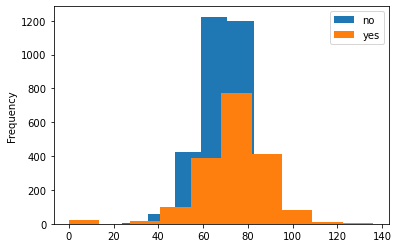

In [41]:
df.groupby('high_bp')['diastolic'].plot(kind='hist', legend=True)

high_bp
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: systolic, dtype: object

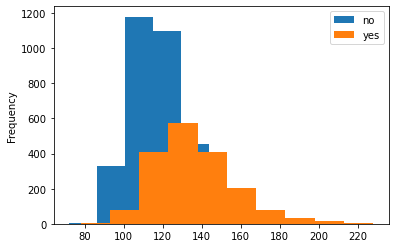

In [42]:
df.groupby('high_bp')['systolic'].plot(kind='hist', legend=True)

In [43]:
df.groupby('high_bp')['diastolic','systolic'].mean()

diastolic    systolic
high_bp                       
no       70.078712  119.336911
yes      73.258726  135.813850

In [44]:
#### fill missing value high_bp
#### high_blood pressure -> 140/90 (systolic/diastolic)
df['high_bp'] = np.where(((df['high_bp'].isnull())&(df['systolic'] > 140)), 'yes', df['high_bp'])
df['high_bp'] = np.where(((df['high_bp'].isnull())&(df['systolic'] <= 140)), 'no', df['high_bp'])

In [45]:
df[(df['high_bp'].isnull()) & ~(df['systolic'].isnull())]

Empty DataFrame
Columns: [id, stat_diabet, diabetic_stat, case_diabet, case1_risk_diabet, case2_diabet, arthritis, gout, thyroid, chronic_bronchitis, abdominal_pain, gallstones, diabetic_relative, overweight, high_bp, high_chol, pulse_60, systolic, diastolic]
Index: []

In [46]:
df[(df['high_bp'].isnull()) & ~(df['diastolic'].isnull())]

Empty DataFrame
Columns: [id, stat_diabet, diabetic_stat, case_diabet, case1_risk_diabet, case2_diabet, arthritis, gout, thyroid, chronic_bronchitis, abdominal_pain, gallstones, diabetic_relative, overweight, high_bp, high_chol, pulse_60, systolic, diastolic]
Index: []

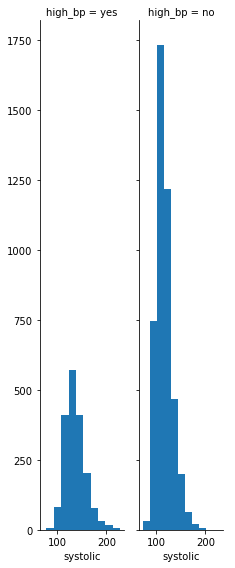

In [47]:
grid = sns.FacetGrid(data=df,col='high_bp', height=8,aspect=0.2,)
grid.map(plt.hist,'systolic').add_legend()
plt.show()

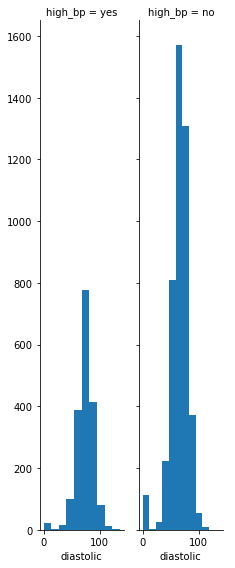

In [48]:
grid = sns.FacetGrid(data=df,col='high_bp', height=8,aspect=0.2,)
grid.map(plt.hist,'diastolic').add_legend()
plt.show()

During follow-up, 1,766 participants were diagnosed with type 2 diabetes. The researchers found that heart rate was correlated with type 2 diabetes.
    - source: https://www.healio.com/news/endocrinology/20190215/higher-heart-rates-related-to-type-2-diabetes-risk-in-normalweight-adults

<AxesSubplot:xlabel='pulse_60'>

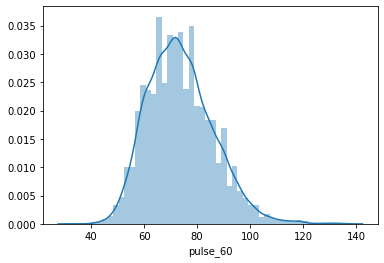

In [49]:
sns.distplot(df['pulse_60'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9235 entries, 0 to 9234
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  9235 non-null   int64  
 1   stat_diabet         8893 non-null   object 
 2   diabetic_stat       8897 non-null   object 
 3   case_diabet         8897 non-null   object 
 4   case1_risk_diabet   8897 non-null   object 
 5   case2_diabet        8004 non-null   object 
 6   arthritis           5552 non-null   object 
 7   gout                5560 non-null   object 
 8   thyroid             5554 non-null   object 
 9   chronic_bronchitis  5563 non-null   object 
 10  abdominal_pain      5564 non-null   object 
 11  gallstones          5554 non-null   object 
 12  diabetic_relative   5487 non-null   object 
 13  overweight          6154 non-null   object 
 14  high_bp             7294 non-null   object 
 15  high_chol           6121 non-null   object 
 16  pulse_

Clinical studies have shown that increased cholesterol levels can predict type 2 diabetes. BP or cholesterol levels could deteriorate insulin secretion and contribute to the development of diabetes.

    Source: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0176615

### Fill missing value high cholesterol from laboratory data Chol

In [51]:
Chol = pd.read_excel("Chol.xlsx")
Chol = Chol.rename(columns={
                    'SEQN':'id',
                    'LBXTC':'total_chol_mg/dL',  
                   })

df = pd.merge(df, Chol, on='id', how='outer')

In [52]:
df[(df['total_chol_mg/dL'].isnull())&(df['high_chol']=='yes')]

id stat_diabet diabetic_stat case_diabet case1_risk_diabet  \
36     93740      diabet        diabet      diabet       risk_diabet   
110    93816      diabet        diabet      diabet       risk_diabet   
178    93886  not_diabet    not_diabet  not_diabet        not_diabet   
202    93910      diabet        diabet      diabet       risk_diabet   
233    93943  not_diabet    not_diabet  not_diabet        not_diabet   
...      ...         ...           ...         ...               ...   
8731  102783      diabet        diabet      diabet       risk_diabet   
8747  102799      diabet        diabet      diabet       risk_diabet   
8771  102825      diabet        diabet      diabet       risk_diabet   
8798  102853   feel_risk     feel_risk  not_diabet       risk_diabet   
8890  102950   prediabet     prediabet   prediabet       risk_diabet   

          case2_diabet arthritis gout thyroid chronic_bronchitis  \
36                 NaN       yes   no      no                 no   
110                NaN       yes   no      no                 no   
178         not_diabet       yes   no      no                 no   
202                NaN       yes   no      no                yes   
233         not_diabet        no   no      no                 no   
...                ...       ...  ...     ...                ...   
8731               NaN        no   no      no                 no   
8747               NaN        no   no      no                 no   
8771               NaN        no   no     yes                yes   
8798        not_diabet        no   no      no                 no   
8890  prediabet/undiag       yes  yes      no                 no   

     abdominal_pain gallstones diabetic_relative overweight high_bp high_chol  \
36              yes         no                no         no     yes       yes   
110              no         no                no         no      no       yes   
178              no         no                no        yes     yes       yes   
202             yes         no               yes        yes     yes       yes   
233              no         no                no         no     yes       yes   
...             ...        ...               ...        ...     ...       ...   
8731             no         no               yes         no      no       yes   
8747             no         no               yes         no     yes       yes   
8771             no         no               yes        yes     yes       yes   
8798             no         no                no         no     yes       yes   
8890            yes         no               yes        yes     yes       yes   

      pulse_60  systolic  diastolic  total_chol_mg/dL  
36        64.0     178.0       78.0               NaN  
110        NaN       NaN        NaN               NaN  
178        NaN       NaN        NaN               NaN  
202        NaN       NaN        NaN               NaN  
233        NaN       NaN        NaN               NaN  
...        ...       ...        ...               ...  
8731      84.0     150.0       62.0               NaN  
8747      74.0     142.0       70.0               NaN  
8771       NaN       NaN        NaN               NaN  
8798      58.0     120.0       68.0               NaN  
8890       NaN       NaN        NaN               NaN  

[200 rows x 20 columns]

In [53]:
df[(df['total_chol_mg/dL'].isnull())&(df['high_chol']=='no')]

id stat_diabet diabetic_stat case_diabet case1_risk_diabet  \
45     93750   prediabet     prediabet   prediabet       risk_diabet   
72     93777  not_diabet    not_diabet  not_diabet        not_diabet   
86     93792        risk          risk  not_diabet       risk_diabet   
93     93799  not_diabet    not_diabet  not_diabet        not_diabet   
129    93835  not_diabet    not_diabet  not_diabet        not_diabet   
...      ...         ...           ...         ...               ...   
8847  102903  not_diabet    not_diabet  not_diabet        not_diabet   
8851  102907      diabet        diabet      diabet       risk_diabet   
8865  102922  not_diabet    not_diabet  not_diabet        not_diabet   
8876  102935        risk          risk  not_diabet       risk_diabet   
8881  102940      diabet        diabet      diabet       risk_diabet   

          case2_diabet arthritis gout thyroid chronic_bronchitis  \
45    prediabet/undiag        no   no     yes                 no   
72          not_diabet        no   no      no                 no   
86          not_diabet        no   no      no                 no   
93          not_diabet        no   no      no                 no   
129         not_diabet        no   no      no                 no   
...                ...       ...  ...     ...                ...   
8847        not_diabet        no   no      no                 no   
8851               NaN        no   no      no                 no   
8865        not_diabet        no   no      no                 no   
8876        not_diabet       yes   no      no                 no   
8881               NaN       yes   no      no                 no   

     abdominal_pain gallstones diabetic_relative overweight high_bp high_chol  \
45               no         no               yes         no     yes        no   
72               no         no               yes        yes     yes        no   
86              yes        yes               yes         no      no        no   
93               no         no               yes         no      no        no   
129             yes         no               yes        yes      no        no   
...             ...        ...               ...        ...     ...       ...   
8847             no         no               NaN         no      no        no   
8851             no         no               yes        yes      no        no   
8865             no         no               yes         no     yes        no   
8876             no         no                no        yes     yes        no   
8881             no         no                no        yes      no        no   

      pulse_60  systolic  diastolic  total_chol_mg/dL  
45         NaN       NaN        NaN               NaN  
72        66.0     134.0       64.0               NaN  
86        98.0       NaN        NaN               NaN  
93        58.0     100.0       58.0               NaN  
129        NaN       NaN        NaN               NaN  
...        ...       ...        ...               ...  
8847      66.0     104.0       56.0               NaN  
8851      84.0     132.0       78.0               NaN  
8865       NaN       NaN        NaN               NaN  
8876      82.0     116.0       64.0               NaN  
8881       NaN       NaN        NaN               NaN  

[507 rows x 20 columns]

<AxesSubplot:xlabel='total_chol_mg/dL'>

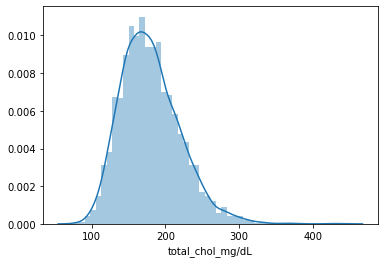

In [54]:
sns.distplot(df['total_chol_mg/dL'])

In [55]:
df.groupby('high_chol')['total_chol_mg/dL'].mean()

high_chol
no     180.504388
yes    195.604072
Name: total_chol_mg/dL, dtype: float64

high_chol
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_chol_mg/dL, dtype: object

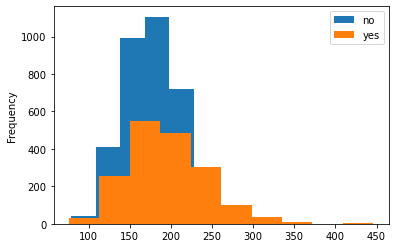

In [56]:
df.groupby('high_chol')['total_chol_mg/dL'].plot(kind='hist', legend=True)
#plt.legend()

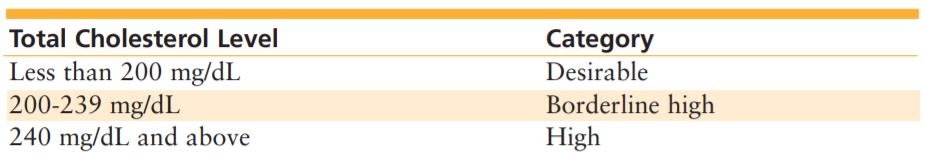
source: https://www.nhlbi.nih.gov/files/docs/public/heart/wyntk.pdf

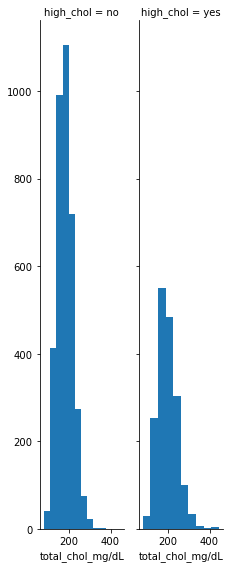

In [57]:
grid = sns.FacetGrid(data=df,col='high_chol', height=8,aspect=0.2,)
grid.map(plt.hist,'total_chol_mg/dL').add_legend()
plt.show()

In [58]:
df[(df['high_chol'].isnull())]

id stat_diabet diabetic_stat case_diabet case1_risk_diabet  \
0      93703  not_diabet    not_diabet  not_diabet        not_diabet   
1      93704  not_diabet    not_diabet  not_diabet        not_diabet   
4      93707  not_diabet    not_diabet  not_diabet        not_diabet   
15     93719  not_diabet    not_diabet  not_diabet        not_diabet   
16     93720  not_diabet    not_diabet  not_diabet        not_diabet   
...      ...         ...           ...         ...               ...   
9230  102840         NaN           NaN         NaN               NaN   
9231  102862         NaN           NaN         NaN               NaN   
9232  102919         NaN           NaN         NaN               NaN   
9233  102927         NaN           NaN         NaN               NaN   
9234  102942         NaN           NaN         NaN               NaN   

     case2_diabet arthritis gout thyroid chronic_bronchitis abdominal_pain  \
0      not_diabet       NaN  NaN     NaN                NaN            NaN   
1      not_diabet       NaN  NaN     NaN                NaN            NaN   
4      not_diabet       NaN  NaN     NaN                NaN            NaN   
15     not_diabet       NaN  NaN     NaN                NaN            NaN   
16     not_diabet       NaN  NaN     NaN                NaN            NaN   
...           ...       ...  ...     ...                ...            ...   
9230          NaN       NaN  NaN     NaN                NaN            NaN   
9231          NaN       NaN  NaN     NaN                NaN            NaN   
9232          NaN       NaN  NaN     NaN                NaN            NaN   
9233          NaN       NaN  NaN     NaN                NaN            NaN   
9234          NaN       NaN  NaN     NaN                NaN            NaN   

     gallstones diabetic_relative overweight high_bp high_chol  pulse_60  \
0           NaN               NaN        NaN     NaN       NaN       NaN   
1           NaN               NaN        NaN     NaN       NaN       NaN   
4           NaN               NaN        NaN      no       NaN     100.0   
15          NaN               NaN        NaN      no       NaN      66.0   
16          NaN               NaN        NaN     NaN       NaN       NaN   
...         ...               ...        ...     ...       ...       ...   
9230        NaN               NaN        NaN     NaN       NaN       NaN   
9231        NaN               NaN        NaN     NaN       NaN       NaN   
9232        NaN               NaN        NaN     NaN       NaN       NaN   
9233        NaN               NaN        NaN     NaN       NaN       NaN   
9234        NaN               NaN        NaN     NaN       NaN       NaN   

      systolic  diastolic  total_chol_mg/dL  
0          NaN        NaN               NaN  
1          NaN        NaN               NaN  
4        128.0       38.0             189.0  
15       102.0       62.0              97.0  
16         NaN        NaN               NaN  
...        ...        ...               ...  
9230       NaN        NaN               NaN  
9231       NaN        NaN               NaN  
9232       NaN        NaN               NaN  
9233       NaN        NaN               NaN  
9234       NaN        NaN               NaN  

[3114 rows x 20 columns]

In [59]:
df[(df['high_chol'].isnull())&~(df['total_chol_mg/dL']==np.nan)]

id stat_diabet diabetic_stat case_diabet case1_risk_diabet  \
0      93703  not_diabet    not_diabet  not_diabet        not_diabet   
1      93704  not_diabet    not_diabet  not_diabet        not_diabet   
4      93707  not_diabet    not_diabet  not_diabet        not_diabet   
15     93719  not_diabet    not_diabet  not_diabet        not_diabet   
16     93720  not_diabet    not_diabet  not_diabet        not_diabet   
...      ...         ...           ...         ...               ...   
9230  102840         NaN           NaN         NaN               NaN   
9231  102862         NaN           NaN         NaN               NaN   
9232  102919         NaN           NaN         NaN               NaN   
9233  102927         NaN           NaN         NaN               NaN   
9234  102942         NaN           NaN         NaN               NaN   

     case2_diabet arthritis gout thyroid chronic_bronchitis abdominal_pain  \
0      not_diabet       NaN  NaN     NaN                NaN            NaN   
1      not_diabet       NaN  NaN     NaN                NaN            NaN   
4      not_diabet       NaN  NaN     NaN                NaN            NaN   
15     not_diabet       NaN  NaN     NaN                NaN            NaN   
16     not_diabet       NaN  NaN     NaN                NaN            NaN   
...           ...       ...  ...     ...                ...            ...   
9230          NaN       NaN  NaN     NaN                NaN            NaN   
9231          NaN       NaN  NaN     NaN                NaN            NaN   
9232          NaN       NaN  NaN     NaN                NaN            NaN   
9233          NaN       NaN  NaN     NaN                NaN            NaN   
9234          NaN       NaN  NaN     NaN                NaN            NaN   

     gallstones diabetic_relative overweight high_bp high_chol  pulse_60  \
0           NaN               NaN        NaN     NaN       NaN       NaN   
1           NaN               NaN        NaN     NaN       NaN       NaN   
4           NaN               NaN        NaN      no       NaN     100.0   
15          NaN               NaN        NaN      no       NaN      66.0   
16          NaN               NaN        NaN     NaN       NaN       NaN   
...         ...               ...        ...     ...       ...       ...   
9230        NaN               NaN        NaN     NaN       NaN       NaN   
9231        NaN               NaN        NaN     NaN       NaN       NaN   
9232        NaN               NaN        NaN     NaN       NaN       NaN   
9233        NaN               NaN        NaN     NaN       NaN       NaN   
9234        NaN               NaN        NaN     NaN       NaN       NaN   

      systolic  diastolic  total_chol_mg/dL  
0          NaN        NaN               NaN  
1          NaN        NaN               NaN  
4        128.0       38.0             189.0  
15       102.0       62.0              97.0  
16         NaN        NaN               NaN  
...        ...        ...               ...  
9230       NaN        NaN               NaN  
9231       NaN        NaN               NaN  
9232       NaN        NaN               NaN  
9233       NaN        NaN               NaN  
9234       NaN        NaN               NaN  

[3114 rows x 20 columns]

In [60]:
df[(df['high_chol']=='no')&(df['total_chol_mg/dL']>200)]

id stat_diabet diabetic_stat case_diabet case1_risk_diabet  \
12     93716  not_diabet    not_diabet  not_diabet        not_diabet   
13     93717  not_diabet    not_diabet  not_diabet        not_diabet   
26     93730      diabet        diabet      diabet       risk_diabet   
47     93752  not_diabet     prediabet   prediabet       risk_diabet   
51     93756  not_diabet    not_diabet  not_diabet        not_diabet   
...      ...         ...           ...         ...               ...   
8863  102920   feel_risk     prediabet   prediabet       risk_diabet   
8883  102943        risk     prediabet   prediabet       risk_diabet   
8884  102944  not_diabet    not_diabet  not_diabet        not_diabet   
8888  102948  not_diabet    not_diabet  not_diabet        not_diabet   
8889  102949  not_diabet     prediabet   prediabet       risk_diabet   

          case2_diabet arthritis gout thyroid chronic_bronchitis  \
12          not_diabet       yes   no      no                 no   
13          not_diabet        no   no      no                 no   
26                 NaN        no   no      no                 no   
47    prediabet/undiag        no   no      no                 no   
51          not_diabet        no   no      no                 no   
...                ...       ...  ...     ...                ...   
8863  prediabet/undiag       yes   no      no                 no   
8883  prediabet/undiag        no   no      no                 no   
8884        not_diabet        no   no      no                 no   
8888        not_diabet        no   no      no                 no   
8889  prediabet/undiag        no   no      no                 no   

     abdominal_pain gallstones diabetic_relative overweight high_bp high_chol  \
12               no         no                no        yes      no        no   
13               no         no                no         no      no        no   
26               no         no               yes         no     yes        no   
47               no         no                no         no      no        no   
51               no         no               yes         no      no        no   
...             ...        ...               ...        ...     ...       ...   
8863             no         no               yes         no     yes        no   
8883             no         no               yes        yes     yes        no   
8884             no         no               yes        yes     yes        no   
8888             no         no                no         no      no        no   
8889             no         no                no         no      no        no   

      pulse_60  systolic  diastolic  total_chol_mg/dL  
12        58.0     120.0       72.0             225.0  
13        60.0     116.0       62.0             213.0  
26        94.0     134.0       74.0             221.0  
47        72.0     126.0       60.0             262.0  
51        62.0     160.0       76.0             241.0  
...        ...       ...        ...               ...  
8863      72.0     166.0       94.0             223.0  
8883      74.0     134.0       80.0             223.0  
8884      82.0       NaN        NaN             214.0  
8888      82.0      88.0       64.0             209.0  
8889      96.0     120.0       72.0             201.0  

[995 rows x 20 columns]

In [61]:
#### high_chol -> >200mg/dL

#### fill missing value high_chol
df['high_chol'] = np.where(((df['high_chol'].isnull())&(df['total_chol_mg/dL'] > 200)), 'yes', df['high_chol'])
df['high_chol'] = np.where(((df['high_chol'].isnull())&(df['total_chol_mg/dL'] <= 200)), 'no', df['high_chol'])

# high_chol no : total_chol_mg/dL > 200 -> yes
df.high_chol.loc[(df['total_chol_mg/dL']>200) & (df['high_chol']=='no')] = 'yes'

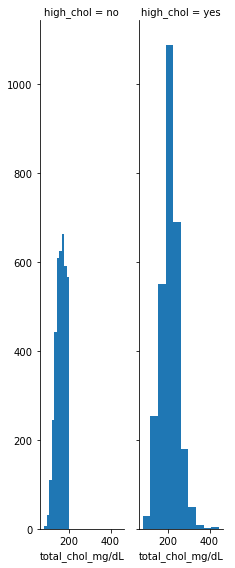

In [62]:
grid = sns.FacetGrid(data=df,col='high_chol', height=8,aspect=0.2,)
grid.map(plt.hist,'total_chol_mg/dL').add_legend()
plt.show()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9235 entries, 0 to 9234
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  9235 non-null   int64  
 1   stat_diabet         8893 non-null   object 
 2   diabetic_stat       8897 non-null   object 
 3   case_diabet         8897 non-null   object 
 4   case1_risk_diabet   8897 non-null   object 
 5   case2_diabet        8004 non-null   object 
 6   arthritis           5552 non-null   object 
 7   gout                5560 non-null   object 
 8   thyroid             5554 non-null   object 
 9   chronic_bronchitis  5563 non-null   object 
 10  abdominal_pain      5564 non-null   object 
 11  gallstones          5554 non-null   object 
 12  diabetic_relative   5487 non-null   object 
 13  overweight          6154 non-null   object 
 14  high_bp             7294 non-null   object 
 15  high_chol           7445 non-null   object 
 16  pulse_

The likelihood and severity of type 2 diabetes are closely linked with body mass index (BMI). 

    Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5507834/

Arm circumference can be alternate anthropometric index of obesity in Type 2 Diabetes and Metabolic Syndrome.
                            Source:https://www.researchgate.net/publication/283848901_Mid_Arm_Circumference_An_Alternate_Anthropometric_Index_of_Obesity_in_Type_2_Diabetes_and_Metabolic_Syndrome

#### Fill missing value overweight (questioner) from data examination Body Measure & Demographic

In [64]:
Body_Measure = pd.read_excel("Body_Measure.xlsx")
Body_Measure = Body_Measure.rename(columns={
                    'SEQN':'id', 
                    'BMXBMI':'bmi',
                    'BMXARMC':'arm_circumference', 
                    'BMXWAIST':'waist',
                    'BMXHIP':'hip',   
})
df = pd.merge(df, Body_Measure, on='id', how='outer')

Demographic = pd.read_excel("Demographic.xlsx")
Demographic = Demographic.rename(columns={
                    'SEQN':'id',
                    'RIAGENDR' :'gender',
                    'RIDRETH3':'race',
                    'RIDEXPRG':'pregnancy',
                   })

Demographic.gender = Demographic.gender.apply(lambda x: 'male' if x==1 else x)
Demographic.gender = Demographic.gender.apply(lambda x: 'female' if x==2 else x)

#1	Mexican American
#2	Other Hispanic
#3	Non-Hispanic White
#4	Non-Hispanic Black
#6	Non-Hispanic Asian
#7	Other Race - Including Multi-Racial	634
#Demographic.race.value_counts()
def parse_values(x):
    if x == 1:
       return 'M'
    elif x == 2:
       return 'H'
    elif x == 3:
       return 'W'
    elif x == 4:
       return 'B'
    elif x == 6:
       return 'A'
    elif x == 7:
       return 'O'
    else:
       return x
Demographic.race = Demographic.race.apply(parse_values)

# 1	Yes, positive lab pregnancy test or self-reported pregnant at exam
# 2	The participant was not pregnant at exam
# 3	Cannot ascertain if the participant is pregnant at exam
#.	Missing	8144
#Demographic.pregnancy.value_counts()
Demographic.pregnancy = Demographic.pregnancy.apply(lambda x: 'yes' if x==1 else x)
Demographic.pregnancy = Demographic.pregnancy.apply(lambda x: 'no' if x==2 else x)
Demographic.pregnancy = Demographic.pregnancy.apply(lambda x: np.nan if x==3 else x)

df = pd.merge(df, Demographic, on='id', how='outer')

#### Fill missing value overweight from column bmi

#### International criteria-based BMI
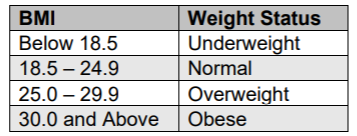
Source:https://www.cdc.gov/obesity/downloads/bmiforpactitioners.pdf

#### Asian criteria-based BMI: 
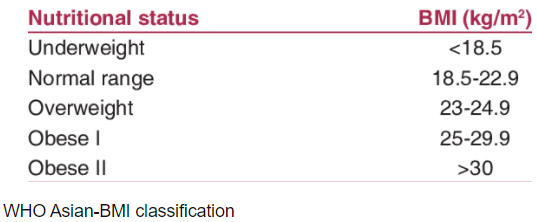
Source:https://www.researchgate.net/figure/WHO-Asian-BMI-classification_tbl1_296026141
 

In [65]:
### International

## overweight nan, bmi>=25 -> yes
df['overweight'] = np.where(((df['overweight'].isnull())&(df['bmi'] >= 25)&~(df['race'] == "A")), 'yes', df['overweight'])

## overweight nan, bmi<25 -> no
df['overweight'] = np.where(((df['overweight'].isnull())&(df['bmi'] < 25)&~(df['race'] == "A")), 'no', df['overweight'])

## bmi<25 -> no overweight
df['overweight'] = np.where(((df['overweight']=='yes')&(df['bmi'] < 25)&~(df['race'] == "A")), 'no', df['overweight'])

## bmi>25 -> yes overweight
df['overweight'] = np.where(((df['overweight']=='no')&(df['bmi'] >= 25)&~(df['race'] == "A")), 'yes', df['overweight'])


### Asian

## overweight nan, bmi >=23 -> yes
df['overweight'] = np.where(((df['overweight'].isnull())&(df['bmi'] >= 23)&(df['race'] == "A")), 'yes', df['overweight'])

## overweight nan, bmi <23 -> no
df['overweight'] = np.where(((df['overweight'].isnull())&(df['bmi'] < 23)&(df['race'] == "A")), 'yes', df['overweight'])

## bmi<23 -> no overweight
df['overweight'] = np.where(((df['overweight']=='yes')&(df['bmi'] < 23)&(df['race'] == "A")), 'no', df['overweight'])

## bmi>23 -> yes overweight
df['overweight'] = np.where(((df['overweight']=='no')&(df['bmi'] >= 23)&(df['race'] == "A")), 'yes', df['overweight'])


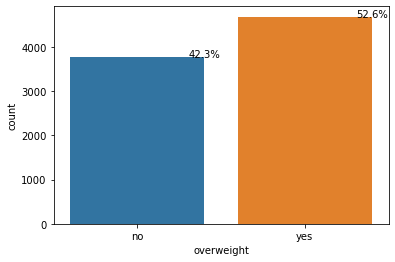

In [66]:
ax = sns.countplot(x='overweight', data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9254 entries, 0 to 9253
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  9254 non-null   int64  
 1   stat_diabet         8893 non-null   object 
 2   diabetic_stat       8897 non-null   object 
 3   case_diabet         8897 non-null   object 
 4   case1_risk_diabet   8897 non-null   object 
 5   case2_diabet        8004 non-null   object 
 6   arthritis           5552 non-null   object 
 7   gout                5560 non-null   object 
 8   thyroid             5554 non-null   object 
 9   chronic_bronchitis  5563 non-null   object 
 10  abdominal_pain      5564 non-null   object 
 11  gallstones          5554 non-null   object 
 12  diabetic_relative   5487 non-null   object 
 13  overweight          8438 non-null   object 
 14  high_bp             7294 non-null   object 
 15  high_chol           7445 non-null   object 
 16  pulse_

#### Fill missing value diabetic relative with column stat_diabet with assumption respondent that feel risk or risk have relative diabetes

In [68]:
df[(df['diabetic_relative'].isnull())&(df['stat_diabet']=='feel_risk')]

id stat_diabet diabetic_stat case_diabet case1_risk_diabet  \
97     93803   feel_risk    not_diabet  not_diabet        not_diabet   
165    93873   feel_risk    not_diabet  not_diabet        not_diabet   
373    94090   feel_risk    not_diabet  not_diabet        not_diabet   
549    94271   feel_risk     prediabet   prediabet       risk_diabet   
626    94353   feel_risk    not_diabet  not_diabet        not_diabet   
...      ...         ...           ...         ...               ...   
8611  102660   feel_risk    not_diabet  not_diabet        not_diabet   
8669  102719   feel_risk     feel_risk  not_diabet       risk_diabet   
8701  102751   feel_risk     feel_risk  not_diabet       risk_diabet   
8773  102827   feel_risk     prediabet   prediabet       risk_diabet   
8895  102955   feel_risk    not_diabet  not_diabet        not_diabet   

          case2_diabet arthritis gout thyroid chronic_bronchitis  ...  \
97          not_diabet       NaN  NaN     NaN                NaN  ...   
165         not_diabet       NaN  NaN     NaN                NaN  ...   
373         not_diabet       NaN  NaN     NaN                NaN  ...   
549   prediabet/undiag       NaN  NaN     NaN                NaN  ...   
626         not_diabet       NaN  NaN     NaN                NaN  ...   
...                ...       ...  ...     ...                ...  ...   
8611        not_diabet       NaN  NaN     NaN                NaN  ...   
8669        not_diabet       NaN  NaN     NaN                NaN  ...   
8701        not_diabet       NaN  NaN     NaN                NaN  ...   
8773  prediabet/undiag       NaN  NaN     NaN                NaN  ...   
8895        not_diabet       NaN  NaN     NaN                NaN  ...   

     systolic diastolic total_chol_mg/dL   bmi arm_circumference  waist  \
97      106.0      54.0            130.0  20.0              25.8   67.7   
165       NaN       NaN            123.0  30.9              33.9   90.7   
373     108.0      68.0            169.0  33.0              36.0   93.6   
549     132.0      60.0            140.0  44.3              42.9  133.0   
626     104.0      74.0            177.0  19.9              26.2   80.4   
...       ...       ...              ...   ...               ...    ...   
8611    106.0      68.0            150.0  36.7              34.9   90.8   
8669      NaN       NaN              NaN   NaN               NaN    NaN   
8701      NaN       NaN              NaN   NaN               NaN    NaN   
8773      NaN       NaN            125.0  25.7              32.5   96.9   
8895    114.0      62.0            150.0  45.6              44.5  113.5   

        hip  gender  race  pregnancy  
97     88.8  female     B        NaN  
165   109.9  female     M        NaN  
373   113.0  female     M        NaN  
549   126.0  female     W        NaN  
626    91.1  female     W        NaN  
...     ...     ...   ...        ...  
8611  122.5    male     M        NaN  
8669    NaN    male     W        NaN  
8701    NaN    male     W        NaN  
8773  101.1    male     W        NaN  
8895  128.3    male     B        NaN  

[89 rows x 27 columns]

In [69]:
df[(df['diabetic_relative'].isnull())&(df['stat_diabet']=='risk')]

id stat_diabet diabetic_stat case_diabet case1_risk_diabet  \
60     93765        risk    not_diabet  not_diabet        not_diabet   
130    93836        risk          risk  not_diabet       risk_diabet   
228    93938        risk    not_diabet  not_diabet        not_diabet   
265    93979        risk    not_diabet  not_diabet        not_diabet   
407    94125        risk    not_diabet  not_diabet        not_diabet   
...      ...         ...           ...         ...               ...   
8603  102652        risk    not_diabet  not_diabet        not_diabet   
8655  102705        risk    not_diabet  not_diabet        not_diabet   
8691  102741        risk     prediabet   prediabet       risk_diabet   
8783  102837        risk          risk  not_diabet       risk_diabet   
8853  102909        risk    not_diabet  not_diabet        not_diabet   

          case2_diabet arthritis gout thyroid chronic_bronchitis  ...  \
60          not_diabet       NaN  NaN     NaN                NaN  ...   
130         not_diabet       NaN  NaN     NaN                NaN  ...   
228         not_diabet       NaN  NaN     NaN                NaN  ...   
265         not_diabet       NaN  NaN     NaN                NaN  ...   
407         not_diabet       NaN  NaN     NaN                NaN  ...   
...                ...       ...  ...     ...                ...  ...   
8603        not_diabet       NaN  NaN     NaN                NaN  ...   
8655        not_diabet       NaN  NaN     NaN                NaN  ...   
8691  prediabet/undiag       NaN  NaN     NaN                NaN  ...   
8783        not_diabet       NaN  NaN     NaN                NaN  ...   
8853        not_diabet       NaN  NaN     NaN                NaN  ...   

     systolic diastolic total_chol_mg/dL   bmi arm_circumference  waist  \
60        NaN       NaN            135.0  21.9              26.5   79.0   
130     112.0      60.0              NaN  19.5              24.4   75.9   
228      92.0      62.0            177.0  23.7              27.7   92.1   
265      96.0      64.0              NaN  25.4              31.4   90.2   
407     128.0      70.0            137.0  32.2              34.3   98.0   
...       ...       ...              ...   ...               ...    ...   
8603    116.0      70.0            169.0  21.2              26.8   70.7   
8655    104.0      76.0            182.0  21.0              25.3   77.4   
8691    108.0      54.0            178.0  38.7              38.1  113.7   
8783    106.0      62.0              NaN  25.5              30.1   88.7   
8853    104.0      58.0            173.0  15.0              19.2   59.4   

        hip  gender  race  pregnancy  
60     94.2  female     W        NaN  
130    88.6  female     M        NaN  
228    94.6  female     O        NaN  
265   108.5  female     W        NaN  
407   114.6  female     A        NaN  
...     ...     ...   ...        ...  
8603   83.1    male     B        NaN  
8655   90.3    male     W        NaN  
8691  121.5    male     A        NaN  
8783  102.0    male     H        NaN  
8853   71.6    male     W        NaN  

[130 rows x 27 columns]

In [70]:
### Fill missing value diabetic relative from column stat_diabet (questioner)
## diabetic relative nan, stat_diabet feel_risk
df['diabetic_relative'] = np.where(((df['diabetic_relative'].isnull())&(df['stat_diabet']=='feel_risk')), 'yes', df['diabetic_relative'])
## diabetic relative nan, stat_diabet risk
df['diabetic_relative'] = np.where(((df['diabetic_relative'].isnull())&(df['stat_diabet']=='risk')), 'yes', df['diabetic_relative'])

There was a significant direct relationship between diabetes risk and waist circumfences and waist hip ratio. The risk increased by 23% and by 28% respectively, for every 10 cm increase in waist circumfences and 10% increase in waist hip ratio.

    Source:https://www.sciencedirect.com/science/article/abs/pii/S1056872716301295

#### Feature Engineering Waist-Hip Ratio

In [71]:
df['WH_ratio'] = round((df.waist/df.hip),2)

<AxesSubplot:xlabel='WH_ratio'>

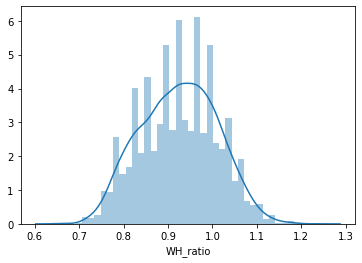

In [72]:
sns.distplot(df['WH_ratio'])

In [73]:
df.drop(['waist','hip',], axis=1, inplace=True)

Smokers are 30 to 40 percent more likely to develop type 2 diabetes than nonsmokers. Smoking can also make managing the disease and regulating insulin levels more difficult because high levels of nicotine can lessen the effectiveness of insulin, causing smokers to need more insulin to regulate blood sugar levels
       Source:https://www.fda.gov/tobacco-products/health-information/cigarette-smoking-risk-factor-type-2-diabetes

#### Data questioner smoke

In [74]:
Cigarette = pd.read_excel("Cigarette.xlsx")
Cigarette = Cigarette.rename(columns={
                    'SEQN':'id',
                    'SMQ020':'smoked_ci',
                   })

# Smoked at least 100 cigarettes in life
# 1	Yes
# 2	No
#Cigarette.smoked_ci.value_counts()

Cigarette.smoked_ci = Cigarette.smoked_ci.apply(lambda x: 'yes' if x==1 else x)
Cigarette.smoked_ci = Cigarette.smoked_ci.apply(lambda x: 'no' if x==2 else x)

Tobacco = pd.read_excel("Tobacco.xlsx")
Tobacco = Tobacco.rename(columns={
                    'SEQN':'id',
                    'SMQ681':'smoked_to',                 
                   })

# Smoked tobacco last 5 days?
# 1	Yes
# 2	No
#Tobacco.smoked_to.value_counts()
Tobacco.smoked_to = Tobacco.smoked_to.apply(lambda x: 'yes' if x==1 else x)
Tobacco.smoked_to = Tobacco.smoked_to.apply(lambda x: 'no' if x==2 else x)

Tobacco = pd.merge(Cigarette, Tobacco, on='id', how='outer')

### smoked_ci dan smoked_to join to column smoked
Tobacco['smoked'] = Tobacco['smoked_ci']

Tobacco['smoked'] = np.where(((Tobacco['smoked']=='no')&(Tobacco['smoked_to']=='yes')), 'yes', Tobacco['smoked'])
Tobacco['smoked'] = np.where(((Tobacco['smoked'].isnull())&(Tobacco['smoked_to']=='yes')), 'yes', Tobacco['smoked'])
Tobacco['smoked'] = np.where(((Tobacco['smoked'].isnull())&(Tobacco['smoked_to']=='no')), 'no', Tobacco['smoked'])

Tobacco = Tobacco[['id', 'smoked']]
df = pd.merge(df, Tobacco, on='id', how='outer')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9254 entries, 0 to 9253
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  9254 non-null   int64  
 1   stat_diabet         8893 non-null   object 
 2   diabetic_stat       8897 non-null   object 
 3   case_diabet         8897 non-null   object 
 4   case1_risk_diabet   8897 non-null   object 
 5   case2_diabet        8004 non-null   object 
 6   arthritis           5552 non-null   object 
 7   gout                5560 non-null   object 
 8   thyroid             5554 non-null   object 
 9   chronic_bronchitis  5563 non-null   object 
 10  abdominal_pain      5564 non-null   object 
 11  gallstones          5554 non-null   object 
 12  diabetic_relative   5706 non-null   object 
 13  overweight          8438 non-null   object 
 14  high_bp             7294 non-null   object 
 15  high_chol           7445 non-null   object 
 16  pulse_

Head fat is a novel method of measuring metabolic disorder in Chinese obese patients
    source:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4107932/

Associations between body fat distribution, insulin resistance and dyslipidaemia in black and white South African women
    source:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5101472/

Type 2 diabetes mellitus is associated with an increased bone mineral density (BMD)
    source:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5918531
   

#### Data examination - Dual-Energy X-ray Absorptiometry - Whole Body

In [76]:
Whole_Body = pd.read_excel("Whole_Body.xlsx")
Whole_Body = Whole_Body.rename(columns={
                    'SEQN':'id', 
                    'DXDHEPF':'head%_fat',
                    'DXDLAPF':'larm%_fat', 
                    'DXDLLPF':'lleg%_fat',  
                    'DXDRAPF':'rarm%_fat', 
                    'DXDRLPF':'rleg%_fat',
                    'DXDTRPF':'trunk%_fat',   
                    'DXDTOBMD':'total_bone_density',
                    'DXDTOPF':'total%_fat',
})
df = pd.merge(df, Whole_Body, on='id', how='outer')

#### Feature engineering arm & leg
df['arm%_fat'] = round(((df['larm%_fat']+df['rarm%_fat'])/2),2)
df['leg%_fat'] = round(((df['lleg%_fat']+df['rleg%_fat'])/2),2)
#df.drop(['larm%_fat','lleg%_fat','rarm%_fat','rleg%_fat'], axis=1, inplace=True)

Indeed, higher iron stores (reflected by an elevated ferritin concentration and a lower ratio of transferrin receptors to ferritin) are associated with an increased risk of type 2 diabetes
    Source:https://care.diabetesjournals.org/content/27/11/2669

In [77]:
Feritin = pd.read_excel("Feritin.xlsx")
Feritin = Feritin.rename(columns={
                    'SEQN':'id',
                    'LBXFER':'feritin', 
                   })
df = pd.merge(df,Feritin, on='id', how='outer')

Iron overload is a risk factor for diabetes. The link between iron and diabetes was first recognized in pathologic conditions—hereditary hemochromatosis and thalassemia—but high levels of dietary iron also impart diabetes risk. Iron plays a direct and causal role in diabetes pathogenesis mediated both by β-cell failure and insulin resistance. Iron is also a factor in the regulation of metabolism in most tissues involved in fuel homeostasis, with the adipocyte in particular serving an iron-sensing role. The underlying molecular mechanisms mediating these effects are numerous and incompletely understood, but include oxidant stress and modulation of adipokines and intracellular signal transduction pathways.
    Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3648340/

In [78]:
Iron = pd.read_excel("Iron.xlsx")
Iron = Iron.rename(columns={
                    'SEQN':'id',
                    'LBXIRN':'iron_ug/dL', 
                    'LBXUIB':'uibc_ug/dL',
                    'LBDTIB':'tibc_ug/dL',
                    'LBDPCT':'transferrin', 
})
df = pd.merge(df,Iron, on='id', how='outer')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9254 entries, 0 to 9253
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  9254 non-null   int64  
 1   stat_diabet         8893 non-null   object 
 2   diabetic_stat       8897 non-null   object 
 3   case_diabet         8897 non-null   object 
 4   case1_risk_diabet   8897 non-null   object 
 5   case2_diabet        8004 non-null   object 
 6   arthritis           5552 non-null   object 
 7   gout                5560 non-null   object 
 8   thyroid             5554 non-null   object 
 9   chronic_bronchitis  5563 non-null   object 
 10  abdominal_pain      5564 non-null   object 
 11  gallstones          5554 non-null   object 
 12  diabetic_relative   5706 non-null   object 
 13  overweight          8438 non-null   object 
 14  high_bp             7294 non-null   object 
 15  high_chol           7445 non-null   object 
 16  pulse_

High Alanine Aminotransferase Is Associated With Decreased Hepatic Insulin Sensitivity and Predicts the Development of Type 2 Diabetes.
    
    Source:https://diabetes.diabetesjournals.org/content/51/6/1889

Insulin resistance is a principal cause of type 2 diabetes and serum albumin has been associated with insulin resistance. 
    
    source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3811792/

Alkaline phosphatase (ALP), an enzyme presented primarily in bone and liver, has been found to elevate in diabetes patients compared with non-diabetes control group.
    
    source:https://www.nature.com/articles/s41598-017-04631-7

Increased activities of liver enzymes such as aspartate aminotransferase (AST) are indicators of hepatocellular injury. Increased activity of these markers is associated with insulin resistance, metabolic syndrome, and type 2 diabetes.
    
    Source: https://care.diabetesjournals.org/content/30/10/2566
    
Serum chloride <100 mmol/L was associated with increased risk of death in adults with type 2 diabetes mellitus
    
    Source: https://journals.lww.com/jhypertension/pages/default.aspx

Variation in Serum Creatinine Level Is Correlated to Risk of Type 2 Diabetes. Serum creatinine reflected body muscle mass and the decrease of serum creatinine might be regarded as a risk factor for type 2 diabetes.

     Source:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3811691/

Gamma globulin levels predict increased risk of diabetes in the Pima population. We suggest that immune function or activation may play a role in the development of type 2 diabetes.

    Source:https://diabetes.diabetesjournals.org/
    
Glucose measurements BIOPRO are used in the diagnosis and treatment of pancreatic islet cell carcinoma and of carbohydrate metabolism disorders, including diabetes mellitus.
    
    Source:https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/BIOPRO_J.htm

Potassium, both serum levels and to a lesser extent dietary intake levels, has been associated with incident diabetes. Lower levels of potassium have been found to be associated with a higher risk of diabetes in some studies.

    Source:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3197792/

Central obesity was independently associated with an increase in the sodium sensitivity of blood pressure and linking type 2 diabetes.
   
    Source:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6224950/


Increased serum calcium levels independently predict the risk for type 2 diabetes,
    
    Source:https://www.medscape.com/viewarticle/830346

Uric acid measurements are used in the diagnosis and treatment of numerous renal and metabolic disorders.
    
    Source:https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/BIOPRO_J.htm

With the deepening of the researches on uric acid, especially in the study of metabolic diseases, uric acid has been found to be closely related to obesity, metabolic syndrome, nonalcoholic fatty liver disease, diabetes, and other metabolic diseases.
    
    Source:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6815590/


##### Data laboratory BIOPRO (Standard Biochemistry Profile data)

In [80]:
BIOPRO = pd.read_excel("BIOPRO.xlsx")
BIOPRO = BIOPRO.rename(columns={
                    'SEQN':'id',
                    'LBXSATSI':'alanine_IU/L', 
                    'LBXSAL':'albumin_g/dL', 
                    'LBXSAPSI':'alkaline_IU/L',
                    'LBXSASSI':'aspartate_IU/L',  
                    'LBXSCLSI':'chloride_mmol/L',  
                    'LBXSCR':'creatinine_mg/dL',
                    'LBXSGB':'globulin_g/dL',  
                    'LBXSGL':'glucose_mg/dL', 
                    'LBXSKSI':'potassium_mmol/L',
                    'LBXSNASI':'sodium_mmol/L',
                    'LBXSCA':'calcium_mg/dL', 
                    'LBXSTR':'triglycerides_mg/dL',
                    'LBXSUA':'uricacid_mg/dL', 

})
df = pd.merge(df, BIOPRO, on='id', how='inner')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6401 entries, 0 to 6400
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   6401 non-null   int64  
 1   stat_diabet          6397 non-null   object 
 2   diabetic_stat        6401 non-null   object 
 3   case_diabet          6401 non-null   object 
 4   case1_risk_diabet    6401 non-null   object 
 5   case2_diabet         5555 non-null   object 
 6   arthritis            5250 non-null   object 
 7   gout                 5258 non-null   object 
 8   thyroid              5250 non-null   object 
 9   chronic_bronchitis   5259 non-null   object 
 10  abdominal_pain       5260 non-null   object 
 11  gallstones           5251 non-null   object 
 12  diabetic_relative    5400 non-null   object 
 13  overweight           6394 non-null   object 
 14  high_bp              6334 non-null   object 
 15  high_chol            6309 non-null   o

##### Data questioner physical activity

In [82]:
Physical = pd.read_excel("Physical.xlsx")
Physical = Physical.rename(columns={
                    'SEQN':'id',
                    'PAQ650':'vigorous_recreational_activities',
                    'PAD680':'minutes_sedentary_activity',                    
                   })

# Do any vigorous-intensity sports, fitness, or recreational activities that cause large increases in breathing or heart rate like running or basketball for at least 10 minutes continuously?
# 1 -> Yes
# 2 -> No
#Physical.vigorous_recreational_activities.value_counts()
Physical.vigorous_recreational_activities = Physical.vigorous_recreational_activities.apply(lambda x: 'yes' if x==1 else x)
Physical.vigorous_recreational_activities = Physical.vigorous_recreational_activities.apply(lambda x: 'no' if x==2 else x)

# Minutes Sedentary Activities in 7 days?
# 0 to 1320 -> Value
# 9999 -> Dont'Know
Physical.minutes_sedentary_activity.value_counts()
Physical.minutes_sedentary_activity = np.where((Physical.minutes_sedentary_activity == 9999.0),np.nan, Physical.minutes_sedentary_activity)

df = pd.merge(df, Physical, on='id', how='inner')

### Drop respondent pregnancy yes

In [83]:
df.pregnancy.value_counts()

no     966
yes     55
Name: pregnancy, dtype: int64

In [84]:
preg_idx = df[df['pregnancy'] == 'yes'].index
df.loc[preg_idx]

id stat_diabet  diabetic_stat case_diabet case1_risk_diabet  \
144    93929  not_diabet     not_diabet  not_diabet        not_diabet   
192    94002        risk           risk  not_diabet       risk_diabet   
382    94302   prediabet      prediabet   prediabet       risk_diabet   
448    94406  not_diabet     not_diabet  not_diabet        not_diabet   
676    94783  not_diabet     not_diabet  not_diabet        not_diabet   
828    95037  not_diabet     not_diabet  not_diabet        not_diabet   
830    95040        risk     not_diabet  not_diabet        not_diabet   
840    95052  not_diabet     not_diabet  not_diabet        not_diabet   
950    95232  not_diabet      prediabet   prediabet       risk_diabet   
1101   95488   prediabet      prediabet   prediabet       risk_diabet   
1104   95494  not_diabet     not_diabet  not_diabet        not_diabet   
1162   95582   feel_risk      feel_risk  not_diabet       risk_diabet   
1244   95703   prediabet      prediabet   prediabet       risk_diabet   
1417   96002        risk      prediabet   prediabet       risk_diabet   
1558   96243  not_diabet     not_diabet  not_diabet        not_diabet   
1599   96313  not_diabet     not_diabet  not_diabet        not_diabet   
1691   96466  not_diabet     not_diabet  not_diabet        not_diabet   
1715   96497  not_diabet     not_diabet  not_diabet        not_diabet   
1953   96879        risk     not_diabet  not_diabet        not_diabet   
2008   96966   feel_risk     not_diabet  not_diabet        not_diabet   
2357   97537  not_diabet      prediabet   prediabet       risk_diabet   
2434   97671  not_diabet     not_diabet  not_diabet        not_diabet   
2498   97771        risk     not_diabet  not_diabet        not_diabet   
2539   97853  not_diabet     not_diabet  not_diabet        not_diabet   
2584   97945  not_diabet     not_diabet  not_diabet        not_diabet   
2606   97972  not_diabet      prediabet   prediabet       risk_diabet   
2654   98052        risk     not_diabet  not_diabet        not_diabet   
2693   98120   prediabet      prediabet   prediabet       risk_diabet   
2728   98187  not_diabet     not_diabet  not_diabet        not_diabet   
2793   98303  not_diabet     not_diabet  not_diabet        not_diabet   
2805   98328        risk     not_diabet  not_diabet        not_diabet   
2848   98395  not_diabet     not_diabet  not_diabet        not_diabet   
3098   98821  not_diabet     not_diabet  not_diabet        not_diabet   
3409   99339   prediabet      prediabet   prediabet       risk_diabet   
3711   99852  not_diabet     not_diabet  not_diabet        not_diabet   
3725   99872        risk     not_diabet  not_diabet        not_diabet   
3756   99920  not_diabet     not_diabet  not_diabet        not_diabet   
3795   99986  not_diabet     not_diabet  not_diabet        not_diabet   
3851  100077  not_diabet     not_diabet  not_diabet        not_diabet   
3960  100258        risk     not_diabet  not_diabet        not_diabet   
4031  100386   prediabet  undiag_diabet      diabet       risk_diabet   
4054  100427  not_diabet     not_diabet  not_diabet        not_diabet   
4078  100465  not_diabet     not_diabet  not_diabet        not_diabet   
4103  100510  not_diabet     not_diabet  not_diabet        not_diabet   
4338  100938  not_diabet     not_diabet  not_diabet        not_diabet   
4468  101151  not_diabet     not_diabet  not_diabet        not_diabet   
4557  101289  not_diabet     not_diabet  not_diabet        not_diabet   
4566  101313  not_diabet      prediabet   prediabet       risk_diabet   
4709  101570  not_diabet     not_diabet  not_diabet        not_diabet   
4795  101709  not_diabet     not_diabet  not_diabet        not_diabet   
4832  101765   feel_risk      prediabet   prediabet       risk_diabet   
4943  101973  not_diabet     not_diabet  not_diabet        not_diabet   
5061  102184  not_diabet     not_diabet  not_diabet        not_diabet   
5336  102635   prediabet      prediabet   prediabet       risk_diabe

In [85]:
df.drop(index=preg_idx, inplace=True)
df.reset_index(drop=True)
df.drop(['pregnancy','stat_diabet',], axis=1, inplace=True)

In [86]:
df.dropna(subset=['diabetic_stat'],inplace=True)
df.drop(['diabetic_stat',], axis=1, inplace=True)

In [87]:
df.head()

id case_diabet case1_risk_diabet      case2_diabet arthritis gout  \
0  93705   prediabet       risk_diabet  prediabet/undiag       yes   no   
1  93706  not_diabet        not_diabet        not_diabet       NaN  NaN   
2  93708   prediabet       risk_diabet  prediabet/undiag       yes   no   
3  93709   prediabet       risk_diabet  prediabet/undiag       yes   no   
4  93711   prediabet       risk_diabet  prediabet/undiag        no   no   

  thyroid chronic_bronchitis abdominal_pain gallstones  ... creatinine_mg/dL  \
0      no                 no             no         no  ...             0.92   
1     NaN                NaN            NaN        NaN  ...             0.81   
2      no                 no             no         no  ...             0.58   
3     yes                 no             no        yes  ...             1.32   
4      no                 no             no         no  ...             1.13   

  globulin_g/dL glucose_mg/dL potassium_mmol/L  sodium_mmol/L  calcium_mg/dL  \
0           2.9          85.0              4.0          141.0            9.2   
1           2.7          94.0              4.4          144.0            9.6   
2           3.2         116.0              4.4          144.0            9.5   
3           3.3          96.0              4.1          141.0            9.9   
4           3.1          98.0              4.9          140.0            9.4   

   triglycerides_mg/dL  uricacid_mg/dL  vigorous_recreational_activities  \
0                 95.0             5.8                                no   
1                 92.0             8.0                                no   
2                 72.0             4.5                                no   
3                132.0             6.2                                no   
4                 59.0             4.2                               yes   

   minutes_sedentary_activity  
0                       300.0  
1                       240.0  
2                       120.0  
3                       600.0  
4                       420.0  

[5 rows x 54 columns]

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5478 entries, 0 to 5532
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                5478 non-null   int64  
 1   case_diabet                       5478 non-null   object 
 2   case1_risk_diabet                 5478 non-null   object 
 3   case2_diabet                      4640 non-null   object 
 4   arthritis                         5195 non-null   object 
 5   gout                              5203 non-null   object 
 6   thyroid                           5195 non-null   object 
 7   chronic_bronchitis                5204 non-null   object 
 8   abdominal_pain                    5205 non-null   object 
 9   gallstones                        5197 non-null   object 
 10  diabetic_relative                 5219 non-null   object 
 11  overweight                        5477 non-null   object 
 12  high_b

### EDA

In [89]:
dfDesc=[]
for i in df.columns:
    dfDesc.append([i,len(df[i]),
                     df[i].dtypes,
                     df[i].isna().sum(),
                     round((((df[i].isna().sum())/(len(df)))*100),2),
                     df[i].nunique(),
                     df[i].drop_duplicates().sample(2, replace=True).values])
pd.DataFrame(dfDesc, columns=['dataFeatures', 'dataLength','dataType', 'null', 'nullPct', 'unique','uniqueSample'])

dataFeatures  dataLength dataType  null  nullPct  \
0                                 id        5478    int64     0     0.00   
1                        case_diabet        5478   object     0     0.00   
2                  case1_risk_diabet        5478   object     0     0.00   
3                       case2_diabet        5478   object   838    15.30   
4                          arthritis        5478   object   283     5.17   
5                               gout        5478   object   275     5.02   
6                            thyroid        5478   object   283     5.17   
7                 chronic_bronchitis        5478   object   274     5.00   
8                     abdominal_pain        5478   object   273     4.98   
9                         gallstones        5478   object   281     5.13   
10                 diabetic_relative        5478   object   259     4.73   
11                        overweight        5478   object     1     0.02   
12                           high_bp        5478   object     0     0.00   
13                         high_chol        5478   object     6     0.11   
14                          pulse_60        5478  float64   260     4.75   
15                          systolic        5478  float64   630    11.50   
16                         diastolic        5478  float64   630    11.50   
17                  total_chol_mg/dL        5478  float64   349     6.37   
18                               bmi        5478  float64    99     1.81   
19                 arm_circumference        5478  float64   278     5.07   
20                            gender        5478   object     0     0.00   
21                              race        5478   object     0     0.00   
22                          WH_ratio        5478  float64   350     6.39   
23                            smoked        5478   object     0     0.00   
24                         head%_fat        5478  float64  2675    48.83   
25                         larm%_fat        5478  float64  2708    49.43   
26                         lleg%_fat        5478  float64  2780    50.75   
27                         rarm%_fat        5478  float64  2778    50.71   
28                         rleg%_fat        5478  float64  2817    51.42   
29                        trunk%_fat        5478  float64  2864    52.28   
30                total_bone_density        5478  float64  3017    55.07   
31                        total%_fat        5478  float64  3026    55.24   
32                          arm%_fat        5478  float64  2848    51.99   
33                          leg%_fat        5478  float64  2875    52.48   
34                           feritin        5478  float64   312     5.70   
35                        iron_ug/dL        5478  float64   357     6.52   
36                        uibc_ug/dL        5478  float64   376     6.86   
37                        tibc_ug/dL        5478  float64   382     6.97   
38                       transferrin        5478  float64   382     6.97   
39                      alanine_IU/L        5478  float64   372     6.79   
40                      albumin_g/dL        5478  float64   370     6.75   
41                     alkaline_IU/L        5478  float64   372     6.79   
42                    aspartate_IU/L        5478  float64   388     7.08   
43                   chloride_mmol/L        5478  float64   370     6.75   
44                  creatinine_mg/dL        5478  float64   371     6.77   
45                     globulin_g/dL        5478  float64   373     6.81   
46                     glucose_mg/dL        5478  float64   373     6.81   
47                  potassium_mmol/L        5478  float64   373     6.81   
48                     sodium_mmol/L        5478  float64   370     6.75   
49                     calcium_mg/dL        5478  float64   373     6.81   
50               triglycerides_mg/dL        5478  float64   373     6.81   
51                    uricacid_mg/dL        5478  float64   373     6.81

In [90]:
categorical = df.select_dtypes('object')
numerical = df.drop(['case1_risk_diabet','id','case2_diabet','case_diabet'],axis=1).select_dtypes('number')
categorical_columns = categorical.columns
numerical_columns = numerical.columns

In [91]:
categorical.describe()

case_diabet case1_risk_diabet case2_diabet arthritis  gout thyroid  \
count         5478              5478         4640      5195  5203    5195   
unique           3                 2            2         2     2       2   
top     not_diabet       risk_diabet   not_diabet        no    no      no   
freq          2325              3196         2325      3593  4882    4577   

       chronic_bronchitis abdominal_pain gallstones diabetic_relative  \
count                5204           5205       5197              5219   
unique                  2              2          2                 2   
top                    no             no         no               yes   
freq                 4836           4068       4612              2699   

       overweight high_bp high_chol  gender  race smoked  \
count        5477    5478      5472    5478  5478   5478   
unique          2       2         2       2     6      2   
top           yes      no       yes  female     W     no   
freq         4100    3418      2825    2818  1884   3132   

       vigorous_recreational_activities  
count                              5478  
unique                                2  
top                                  no  
freq                               4135

In [92]:
numerical.describe().T

count        mean         std      min       25%  \
pulse_60                    5218.0   71.756612   11.630096   34.000   64.0000   
systolic                    4848.0  126.166254   19.729165   72.000  112.0000   
diastolic                   4848.0   71.804455   13.495849    0.000   64.0000   
total_chol_mg/dL            5129.0  186.747709   41.037238   76.000  158.0000   
bmi                         5379.0   29.671017    7.444264   14.200   24.6000   
arm_circumference           5200.0   33.314154    5.332637   17.900   29.5000   
WH_ratio                    5128.0    0.936437    0.082071    0.660    0.8800   
head%_fat                   2803.0   24.026543    0.643938   21.700   23.6000   
larm%_fat                   2770.0   34.669928   11.893305   10.500   25.1250   
lleg%_fat                   2698.0   35.413862    9.920786   10.700   27.5000   
rarm%_fat                   2700.0   33.620926   11.377260   11.100   24.5000   
rleg%_fat                   2661.0   35.480158    9.807546   10.900   27.7000   
trunk%_fat                  2614.0   32.140321    8.900785   10.100   26.2250   
total_bone_density          2461.0    1.116924    0.106266    0.697    1.0440   
total%_fat                  2452.0   33.242577    8.639738   12.100   27.1000   
arm%_fat                    2630.0   33.975380   11.538458   11.000   24.7625   
leg%_fat                    2603.0   35.369939    9.811994   11.100   27.6000   
feritin                     5166.0  157.872365  195.810988    1.040   51.0000   
iron_ug/dL                  5121.0   86.405194   36.364738   11.000   62.0000   
uibc_ug/dL                  5102.0  236.921011   64.258333   12.000  196.0000   
tibc_ug/dL                  5096.0  323.311813   51.462767  139.000  289.0000   
transferrin                 5096.0   27.324372   11.725657    2.000   19.0000   
alanine_IU/L                5106.0   22.292009   17.528327    3.000   13.0000   
albumin_g/dL                5108.0    4.057146    0.334127    2.100    3.8000   
alkaline_IU/L               5106.0   79.796906   27.458348   16.000   63.0000   
aspartate_IU/L              5090.0   22.086051   13.492691    6.000   16.0000   
chloride_mmol/L             5108.0  100.997847    2.870652   84.000   99.0000   
creatinine_mg/dL            5107.0    0.904991    0.469186    0.250    0.7100   
globulin_g/dL               5105.0    3.097943    0.438536    1.800    2.8000   
glucose_mg/dL               5105.0  102.765524   36.810075   47.000   87.0000   
potassium_mmol/L            5105.0    4.084270    0.368368    2.800    3.8000   
sodium_mmol/L               5108.0  140.346907    2.786414  121.000  139.0000   
calcium_mg/dL               5105.0    9.290891    0.371693    6.400    9.1000   
triglycerides_mg/dL         5105.0  143.695397  113.717016   25.000   81.0000   
uricacid_mg/dL              5105.0    5.477904    1.491893    0.800    4.4000   
minutes_sedentary_activity  5436.0  331.856512  200.121171    0.000  180.0000   

                                50%       75%       max  
pulse_60                     70.000   78.0000   136.000  
systolic                    124.000  136.0000   228.000  
diastolic                    72.000   80.0000   136.000  
total_chol_mg/dL            183.000  212.0000   446.000  
bmi                          28.400   33.5000    86.200  
arm_circumference            32.900   36.6000    56.300  
WH_ratio                      0.940    0.9925     1.240  
head%_fat                    24.000   24.4000    27.500  
larm%_fat                    34.000   44.1000    69.200  
lleg%_fat                    35.900   43.5000    61.100  
rarm%_fat                    32.750   42.6000    66.800  
rleg%_fat                    35.900   43.3000    62.600  
trunk%_fat                   32.600   39.1000    56.400  
total_bone_density            1.113    1.1830     1.728  
total%_fat                   33.100   40.3000    56.100  
arm%_fat                     33.100   43.1375    66.800  
leg%_fat                     35.900   43.2500

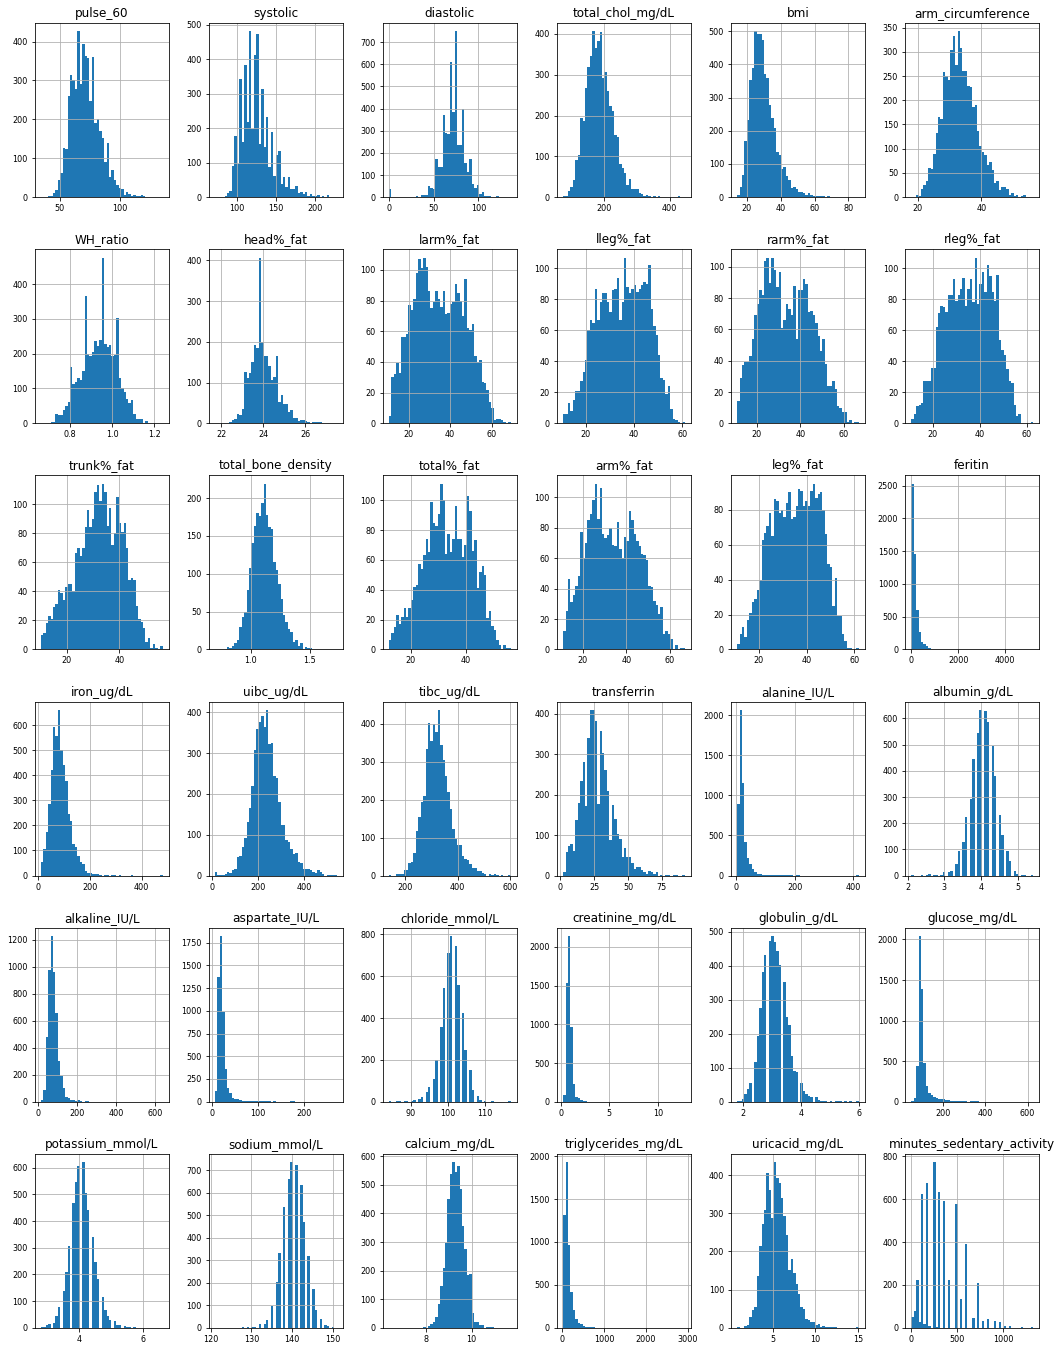

In [93]:
numerical.hist(figsize=(18, 24), bins=50, xlabelsize=8, ylabelsize=8);

Hypothesis Testing : 
- H0 : The data is normal distributed
- H1 : The data isn't normal distributed

Significance level : 5%

#### Normality Test Anderson Numerical Column

In [94]:
# Normality Test Anderson

for i in numerical:
    from scipy.stats import anderson
    result = anderson(df[i].dropna())
    print(i)
    print('Statistic: %.3f' % result.statistic)
    p = 0
    sl, cv = result.significance_level[2], result.critical_values[2]
    if result.statistic < result.critical_values[2]:
        print('p-value (%.3f): %.3f \nData Normal Distribution' % (sl, cv))
    else:
        print('p-value (%.3f): %.3f \nData Not-Normal Distribution' % (sl, cv))
    print('\n')

pulse_60
Statistic: 26.703
p-value (5.000): 0.786 
Data Not-Normal Distribution


systolic
Statistic: 56.526
p-value (5.000): 0.786 
Data Not-Normal Distribution


diastolic
Statistic: 33.361
p-value (5.000): 0.786 
Data Not-Normal Distribution


total_chol_mg/dL
Statistic: 15.788
p-value (5.000): 0.786 
Data Not-Normal Distribution


bmi
Statistic: 69.298
p-value (5.000): 0.786 
Data Not-Normal Distribution


arm_circumference
Statistic: 13.057
p-value (5.000): 0.786 
Data Not-Normal Distribution


WH_ratio
Statistic: 7.092
p-value (5.000): 0.786 
Data Not-Normal Distribution


head%_fat
Statistic: 20.635
p-value (5.000): 0.786 
Data Not-Normal Distribution


larm%_fat
Statistic: 15.660
p-value (5.000): 0.786 
Data Not-Normal Distribution


lleg%_fat
Statistic: 12.467
p-value (5.000): 0.786 
Data Not-Normal Distribution


rarm%_fat
Statistic: 15.504
p-value (5.000): 0.786 
Data Not-Normal Distribution


rleg%_fat
Statistic: 11.730
p-value (5.000): 0.786 
Data Not-Normal Distribution



#### CORR SPEARMAN (NUM VS NUM)

<AxesSubplot:>

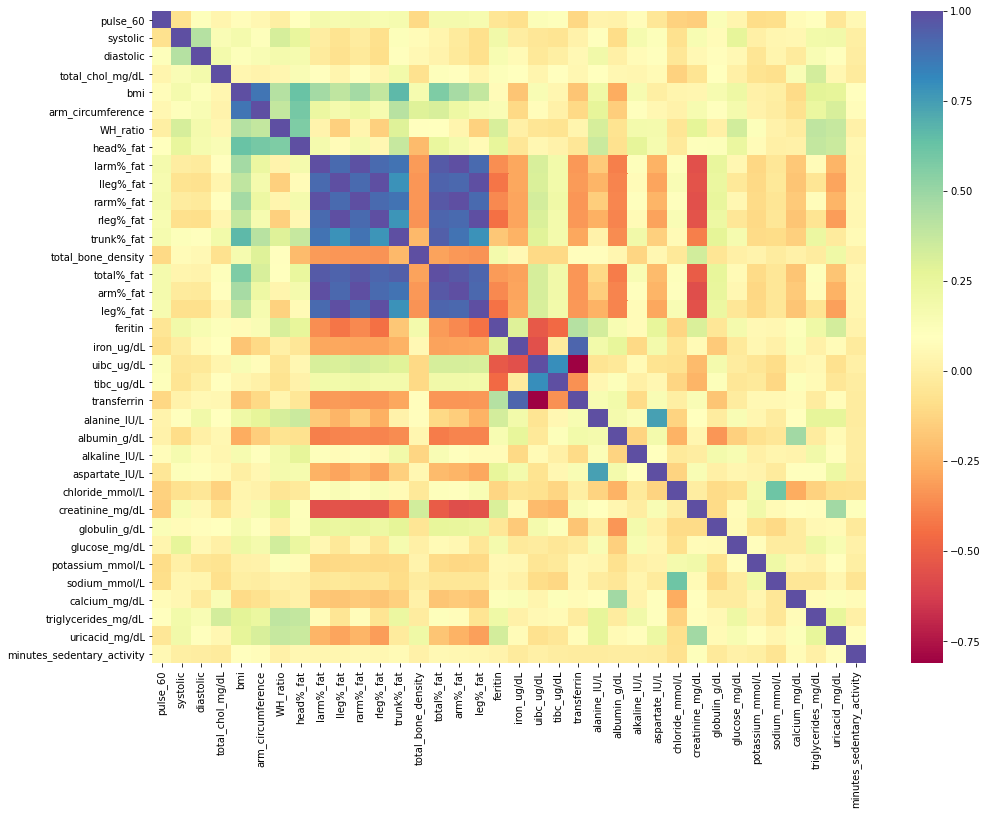

In [95]:
plt.figure(figsize=(16,12))
sns.heatmap(numerical.corr('spearman'),cmap='Spectral')

In [96]:
numerical.corr('spearman')

pulse_60  systolic  diastolic  total_chol_mg/dL  \
pulse_60                    1.000000 -0.074901   0.109744          0.036584   
systolic                   -0.074901  1.000000   0.424546          0.142794   
diastolic                   0.109744  0.424546   1.000000          0.183883   
total_chol_mg/dL            0.036584  0.142794   0.183883          1.000000   
bmi                         0.077688  0.176860   0.120502          0.043535   
arm_circumference           0.050980  0.112093   0.150346          0.026927   
WH_ratio                    0.002126  0.322150   0.178553          0.040896   
head%_fat                   0.099194  0.253950   0.170461          0.141538   
larm%_fat                   0.175528 -0.010114  -0.025123          0.092425   
lleg%_fat                   0.161012 -0.065553  -0.068478          0.032851   
rarm%_fat                   0.174408 -0.017405  -0.026592          0.090673   
rleg%_fat                   0.156800 -0.079297  -0.082895          0.040346   
trunk%_fat                  0.167616  0.115717   0.105785          0.187253   
total_bone_density         -0.107239  0.069920   0.058788         -0.071570   
total%_fat                  0.172651  0.032175   0.026939          0.115278   
arm%_fat                    0.178675 -0.019391  -0.027268          0.092540   
leg%_fat                    0.159001 -0.078102  -0.080295          0.037014   
feritin                    -0.049826  0.200452   0.156688          0.119686   
iron_ug/dL                 -0.081044 -0.004656   0.059582          0.095892   
uibc_ug/dL                  0.128420 -0.044195  -0.033953          0.037601   
tibc_ug/dL                  0.111745 -0.060484   0.000221          0.094106   
transferrin                -0.116293  0.017610   0.056054          0.048551   
alanine_IU/L                0.030379  0.104321   0.193617          0.096805   
albumin_g/dL                0.021798 -0.095646   0.005266          0.048558   
alkaline_IU/L               0.078522  0.171437   0.068122          0.043567   
aspartate_IU/L             -0.041678  0.119305   0.107599          0.063942   
chloride_mmol/L            -0.137199 -0.070161  -0.044429         -0.136664   
creatinine_mg/dL           -0.148426  0.152058   0.057793         -0.055381   
globulin_g/dL               0.131428  0.070596   0.087093          0.101042   
glucose_mg/dL               0.033690  0.268032   0.055846          0.007966   
potassium_mmol/L           -0.090359  0.008801  -0.051646         -0.062416   
sodium_mmol/L              -0.085598  0.044570   0.032858         -0.075420   
calcium_mg/dL               0.068431  0.049301  -0.023166          0.137460   
triglycerides_mg/dL         0.092710  0.192054   0.146971          0.330877   
uricacid_mg/dL             -0.044075  0.198860   0.106721          0.046784   
minutes_sedentary_activity  0.052581 -0.003134  -0.010706         -0.022219   

                                 bmi  arm_circumference  WH_ratio  head%_fat  \
pulse_60                    0.077688           0.050980  0.002126   0.099194   
systolic                    0.176860           0.112093  0.322150   0.253950   
diastolic                   0.120502           0.150346  0.178553   0.170461   
total_chol_mg/dL            0.043535           0.026927  0.040896   0.141538   
bmi                         1.000000           0.879165  0.426567   0.628985   
arm_circumference           0.879165           1.000000  0.383612   0.595074   
WH_ratio                    0.426567           0.383612  1.000000   0.571622   
head%_fat                   0.628985           0.595074  0.571622   1.000000   
larm%_fat                   0.475226           0.232466  0.025890   0.175502   
lleg%_fat                   0.394993           0.173131 -0.140215   0.068112   
rarm%_fat                   0.471442           0.224802  0.033657   0.174385   
rleg%_fat                   0.381352           0.162189 -0.144442   0.050743   
trunk%_fat                  0.664152           0.419276  0.29273

#### Countplot Categorical Column

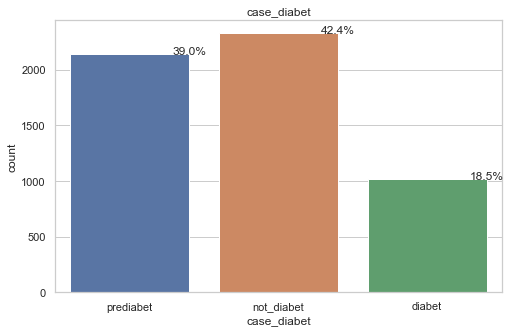

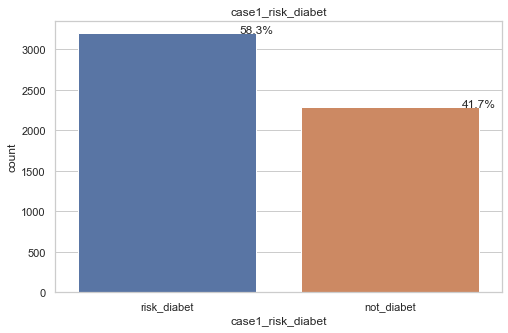

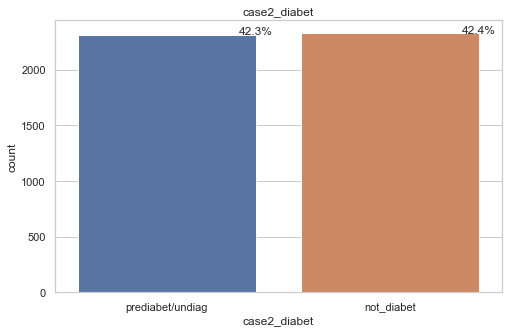

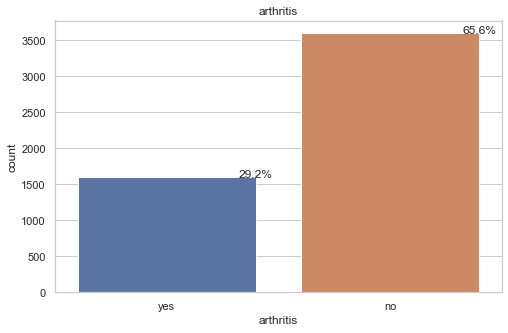

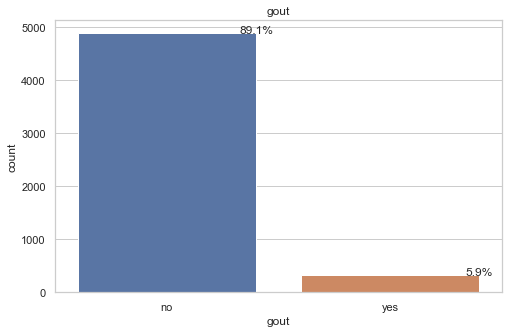

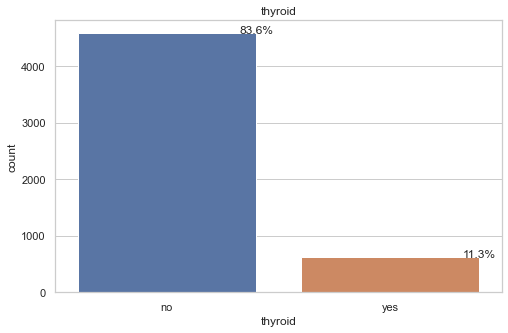

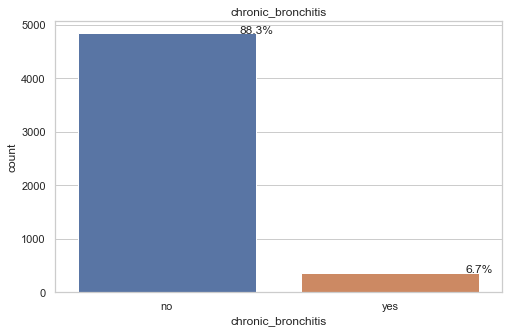

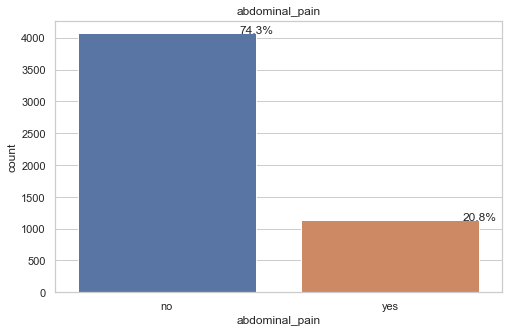

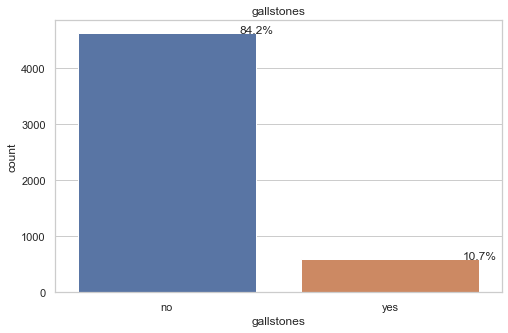

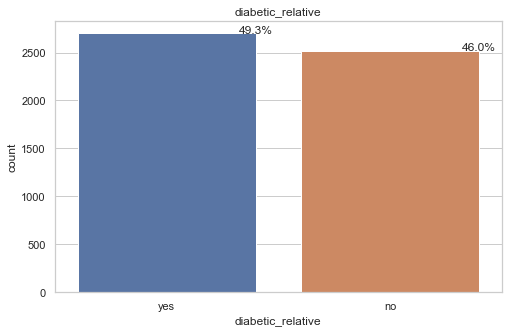

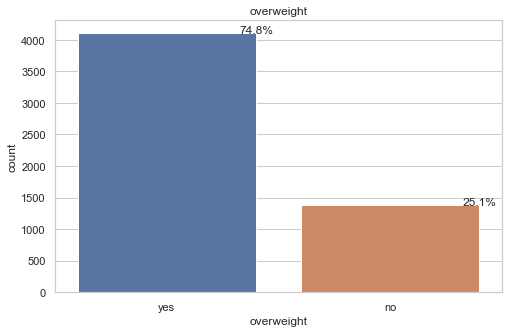

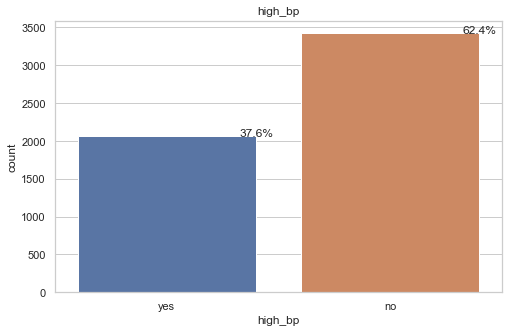

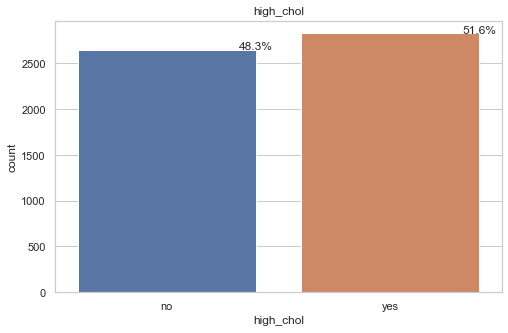

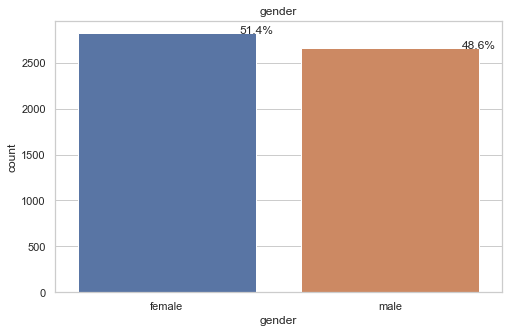

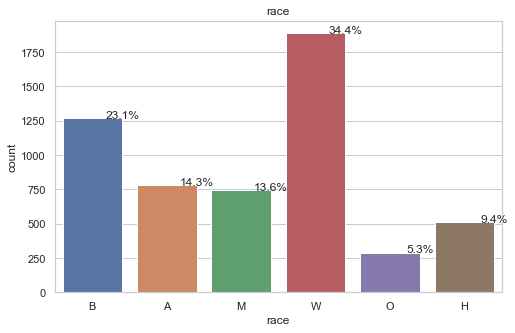

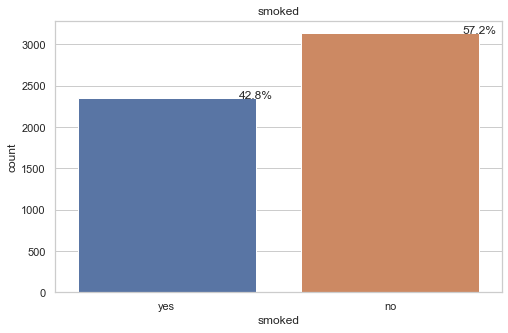

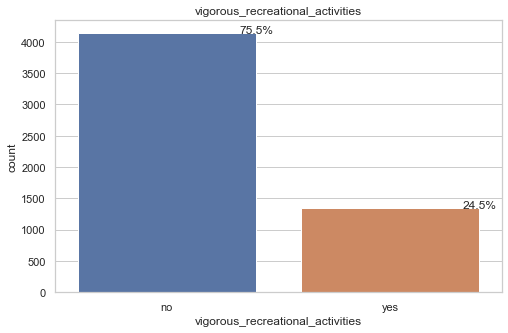

In [97]:
for i in categorical:
    total = float(len(df[i]))
    sns.set(style="whitegrid")
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=df[i], data=df,)
    plt.title(i)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
    plt.show()

#### CRAMERS V ( CATEGORICAL VS CATEGORICAL)

In [98]:
def cramers_v(x, y):
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [99]:
import scipy.stats as ss
cramers = []
for i in categorical_columns:
    cramerstemp = []
    for j in categorical.columns:
        cramerstemp.append(cramers_v(df[i], df[j]))
    cramers.append(cramerstemp)
CramersV= pd.DataFrame(data=cramers, columns = categorical_columns, index=categorical_columns)

<AxesSubplot:>

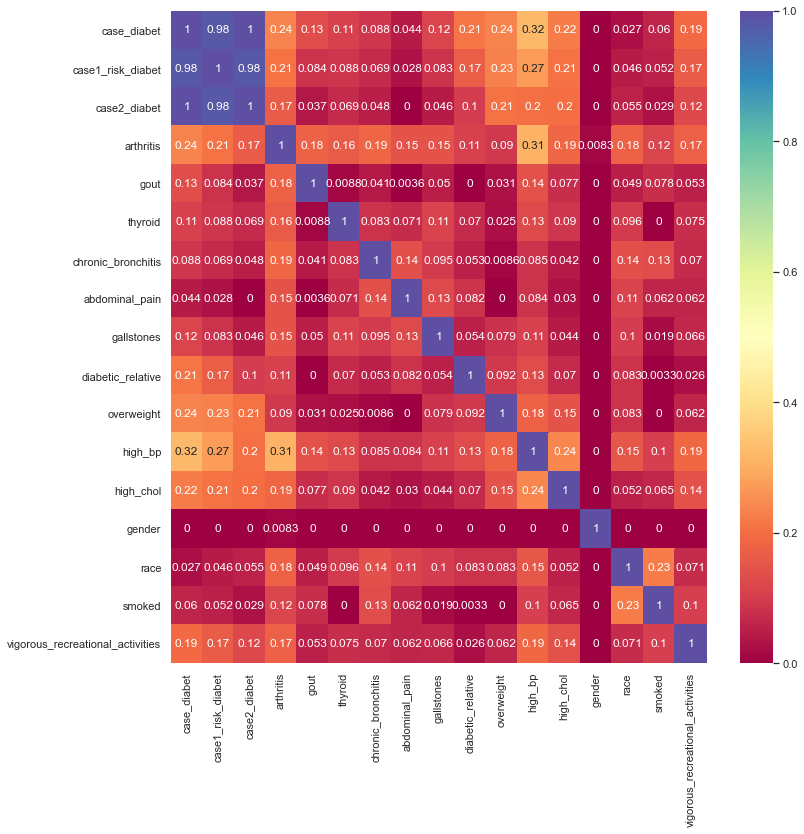

In [100]:
plt.figure(figsize=(12,12))
sns.heatmap(CramersV, annot=True,cmap='Spectral')

In [101]:
df.drop(columns=['id','case1_risk_diabet','case2_diabet','case_diabet']).groupby('gender').mean().T

gender                          female        male
pulse_60                     71.901161   71.605026
systolic                    126.300856  126.028392
diastolic                    71.832042   71.776200
total_chol_mg/dL            186.394876  187.126061
bmi                          29.668777   29.673384
arm_circumference            33.304294   33.324623
WH_ratio                      0.936921    0.935926
head%_fat                    24.041049   24.011435
larm%_fat                    34.784757   34.549667
lleg%_fat                    35.441523   35.384380
rarm%_fat                    33.782899   33.451591
rleg%_fat                    35.540393   35.415851
trunk%_fat                   32.163820   32.115794
total_bone_density            1.115462    1.118472
total%_fat                   33.304044   33.177498
arm%_fat                     34.099071   33.845717
leg%_fat                     35.397404   35.340438
feritin                     154.675705  161.299832
iron_ug/dL                   86.691814   86.097571
uibc_ug/dL                  237.727479  236.054878
tibc_ug/dL                  324.385839  322.156415
transferrin                  27.397577   27.245621
alanine_IU/L                 22.324754   22.256899
albumin_g/dL                  4.060863    4.053163
alkaline_IU/L                79.946253   79.636769
aspartate_IU/L               22.051632   22.122964
chloride_mmol/L             100.993565  101.002433
creatinine_mg/dL              0.907294    0.902523
globulin_g/dL                 3.097539    3.098377
glucose_mg/dL               102.687618  102.849026
potassium_mmol/L              4.092124    4.075852
sodium_mmol/L               140.334974  140.359692
calcium_mg/dL                 9.297349    9.283969
triglycerides_mg/dL         143.062098  144.374188
uricacid_mg/dL                5.501893    5.452192
minutes_sedentary_activity  328.281675  335.637017

In [102]:
df.drop(columns=['id','case1_risk_diabet','case2_diabet','case_diabet']).groupby('race').mean().T

race                                 A           B           H           M  \
pulse_60                     71.361413   71.452893   71.262055   71.356223   
systolic                    124.170520  130.717902  125.346939  123.936460   
diastolic                    73.020231   73.768535   71.501134   71.007564   
total_chol_mg/dL            191.467133  185.127193  188.455852  186.109875   
bmi                          26.027426   31.071245   29.446293   30.663512   
arm_circumference            30.706920   34.646794   32.945929   33.802263   
WH_ratio                      0.920872    0.922951    0.936638    0.952170   
head%_fat                    23.898526   23.957986   24.029885   24.202564   
larm%_fat                    34.237872   33.060611   35.563320   36.390141   
lleg%_fat                    33.982251   34.925000   35.731783   36.290802   
rarm%_fat                    33.485965   31.771278   34.791829   35.498795   
rleg%_fat                    34.117174   35.031250   35.836822   36.314048   
trunk%_fat                   32.221795   31.063212   32.983200   34.004278   
total_bone_density            1.079034    1.174793    1.099070    1.099413   
total%_fat                   32.514253   31.991258   33.689754   34.989394   
arm%_fat                     33.712417   32.109871   35.123000   35.824939   
leg%_fat                     34.054934   34.829282   35.747200   36.282854   
feritin                     187.092763  165.481991  139.447943  149.862674   
iron_ug/dL                   89.785414   79.100789   87.318930   90.770515   
uibc_ug/dL                  241.265537  233.963972  240.605372  242.697902   
tibc_ug/dL                  330.957627  312.881266  327.865702  333.616783   
transferrin                  27.891243   25.906772   27.208678   27.955245   
alanine_IU/L                 22.838028   19.387522   24.256198   25.828212   
albumin_g/dL                  4.158169    3.958524    4.070165    4.088827   
alkaline_IU/L                73.454930   80.480668   82.566116   84.895251   
aspartate_IU/L               21.919263   21.602293   23.080913   22.928671   
chloride_mmol/L             100.600000  101.331283  101.055556  101.103352   
creatinine_mg/dL              0.831028    1.002100    0.845175    0.803980   
globulin_g/dL                 3.161408    3.283831    3.155876    3.112448   
glucose_mg/dL               101.447887  101.415641  105.422680  105.173427   
potassium_mmol/L              4.045775    4.000440    4.064124    4.098603   
sodium_mmol/L               140.146479  140.383128  140.329218  140.811453   
calcium_mg/dL                 9.303380    9.313533    9.283093    9.218462   
triglycerides_mg/dL         156.201408  109.640598  163.558763  167.416783   
uricacid_mg/dL                5.572958    5.597364    5.336289    5.257203   
minutes_sedentary_activity  343.317542  346.857824  257.228797  251.362772   

race                                 O           W  
pulse_60                     73.914286   72.070485  
systolic                    124.546875  125.336879  
diastolic                    73.234375   70.197400  
total_chol_mg/dL            187.121771  185.633834  
bmi                          30.386525   29.811507  
arm_circumference            34.231250   33.260310  
WH_ratio                      0.937707    0.945467  
head%_fat                    24.098324   24.039071  
larm%_fat                    33.285549   35.169637  
lleg%_fat                    35.530061   36.001363  
rarm%_fat                    32.545122   33.876464  
rleg%_fat                    35.076730   36.102363  
trunk%_fat                   31.684472   31.821995  
total_bone_density            1.140400    1.112992  
total%_fat                   32.735135   33.485657  
arm%_fat                     32.789571   34.318466  
leg%_fat                     35.220513   35.935275  
feritin                     161.651282  149.095113  
iron_ug/dL                   87.856618   87.492737  
uibc_ug/dL                  234.904412  234.077311  


In [103]:
categorical = df.select_dtypes('object')
numerical = df.drop(['id',],axis=1).select_dtypes('number')
categorical_columns = categorical.columns
numerical_columns = numerical.columns

<AxesSubplot:xlabel='value', ylabel='variable'>

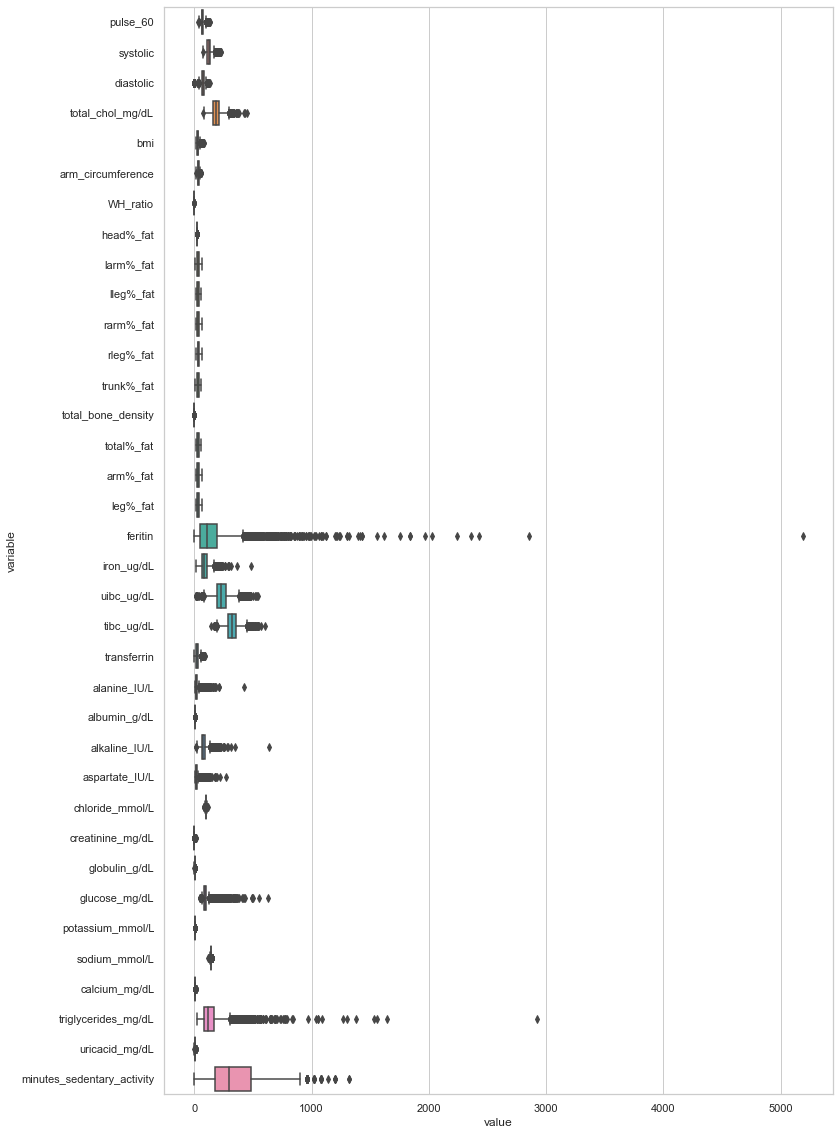

In [104]:
plt.figure(figsize=(12,20))
sns.boxplot(y='variable', x='value', data=pd.melt(numerical))

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5478 entries, 0 to 5532
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                5478 non-null   int64  
 1   case_diabet                       5478 non-null   object 
 2   case1_risk_diabet                 5478 non-null   object 
 3   case2_diabet                      4640 non-null   object 
 4   arthritis                         5195 non-null   object 
 5   gout                              5203 non-null   object 
 6   thyroid                           5195 non-null   object 
 7   chronic_bronchitis                5204 non-null   object 
 8   abdominal_pain                    5205 non-null   object 
 9   gallstones                        5197 non-null   object 
 10  diabetic_relative                 5219 non-null   object 
 11  overweight                        5477 non-null   object 
 12  high_b

#### Save csv file to folder case 1

In [106]:
df.drop(['case2_diabet','case_diabet','id'], axis=1).to_csv(r'C:\Users\dinan\Documents\GitHub\Final-Project-Diabetes-Type-II-Risk-Prediction\Case1\data_diabetes1.csv',index=False, header=True)

In [107]:
## deployment model
df.drop(['case2_diabet','case_diabet','id'], axis=1).to_csv(r'C:\Users\dinan\Documents\GitHub\Final-Project-Diabetes-Type-II-Risk-Prediction\Deployment Model\data_diabetes1.csv',index=False, header=True)

We return to initial process data preparation after EDA & modelling in case I and case II. Because from process features selection we found that head % fat and trunk % fat have influences to target risk diabetes (case 1) & head % fat have influences for target risk prediabetes (case 2). 

We not add features head % fat and trunk % fat in case 1 because based on the usability of the application risk diabetes. We choose features can be easily obtained by the community, beside that if we add that features no improvement in evaluation model.

For case 2 (predicting risk diabetes), we fill missing value for head % fat because this features importance for predict risk prediabetes but percentage missing > 50 %. We use kkn imputer for fill missing value head % fat. 

##### Fill Missing Value % head fat

In [108]:
from sklearn.impute import KNNImputer

We choose features which we assume is related to head % fat

In [109]:
imp = df[['bmi', 'arm_circumference',
       'WH_ratio','head%_fat', 'larm%_fat',
       'lleg%_fat', 'rarm%_fat', 'rleg%_fat', 'trunk%_fat',]]

In [110]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5,weights='distance')
imp_filled = imputer.fit_transform(imp)

In [111]:
imp_filled

array([[31.7       , 32.        ,  0.93      , ..., 38.782402  ,
        37.80448256, 39.1092904 ],
       [21.5       , 27.        ,  0.84      , ..., 25.6       ,
        23.9       , 20.9       ],
       [23.7       , 27.4       ,  0.98      , ..., 37.08006686,
        42.21631037, 33.59995834],
       ...,
       [35.8       , 40.6       ,  1.02      , ..., 37.00433075,
        38.24961043, 35.67648041],
       [26.1       , 26.8       ,  0.84      , ..., 33.96539789,
        41.67706181, 30.8       ],
       [36.1       , 40.        ,  1.11      , ..., 51.09983708,
        53.29977136, 32.1       ]])

In [112]:
imp_filled = pd.DataFrame(imp_filled, columns=imp.columns)

In [113]:
imp_filled

bmi  arm_circumference  WH_ratio  head%_fat  larm%_fat  lleg%_fat  \
0     31.7               32.0      0.93  24.072655  37.892642  37.870009   
1     21.5               27.0      0.84  24.400000  26.000000  23.700000   
2     23.7               27.4      0.98  23.771312  38.076960  43.071327   
3     38.9               38.1      0.86  24.789619  44.565812  41.025863   
4     21.3               30.8      0.95  23.500000  18.500000  22.300000   
...    ...                ...       ...        ...        ...        ...   
5473  23.7               32.9      0.87  23.900000  13.800000  19.800000   
5474  20.0               25.1      0.94  22.967715  30.161523  39.099268   
5475  35.8               40.6      1.02  24.627419  38.385765  38.220433   
5476  26.1               26.8      0.84  22.900000  33.700000  41.900000   
5477  36.1               40.0      1.11  24.200000  51.099824  54.699730   

      rarm%_fat  rleg%_fat  trunk%_fat  
0     38.782402  37.804483   39.109290  
1     25.600000  23.900000   20.900000  
2     37.080067  42.216310   33.599958  
3     35.541936  43.675526   40.639104  
4     19.900000  23.200000   23.700000  
...         ...        ...         ...  
5473  12.300000  19.100000   12.400000  
5474  31.223694  39.509973   25.019946  
5475  37.004331  38.249610   35.676480  
5476  33.965398  41.677062   30.800000  
5477  51.099837  53.299771   32.100000  

[5478 rows x 9 columns]

<AxesSubplot:ylabel='Frequency'>

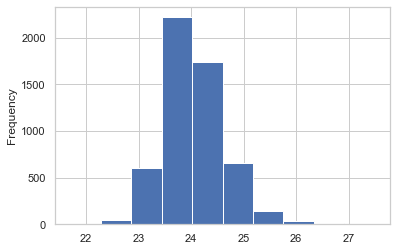

In [114]:
### Head % fat after fill missing value
imp_filled['head%_fat'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

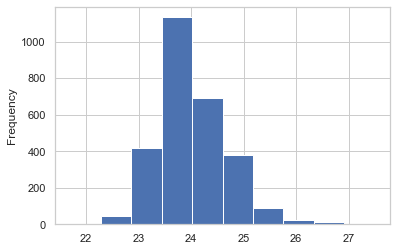

In [115]:
### Head % fat before fill missing value
imp['head%_fat'].plot(kind='hist')

In [116]:
imp_idx = imp[(imp['head%_fat'].isnull())].index.values

In [117]:
imp_filled.loc[imp_filled.index.intersection(imp_idx)]['head%_fat']

0       24.072655
2       23.771312
3       24.789619
6       23.716200
8       24.046493
          ...    
5464    24.689600
5471    23.645910
5472    23.000000
5474    22.967715
5476    22.900000
Name: head%_fat, Length: 2646, dtype: float64

In [118]:
imp_filled['head%_fat']

0       24.072655
1       24.400000
2       23.771312
3       24.789619
4       23.500000
          ...    
5473    23.900000
5474    22.967715
5475    24.627419
5476    22.900000
5477    24.200000
Name: head%_fat, Length: 5478, dtype: float64

In [119]:
head_imp = []
for idx, val in enumerate(imp_filled['head%_fat']):
     head_imp.append(val)

In [120]:
len(head_imp)

5478

In [121]:
df['head%_fat'] = head_imp

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5478 entries, 0 to 5532
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                5478 non-null   int64  
 1   case_diabet                       5478 non-null   object 
 2   case1_risk_diabet                 5478 non-null   object 
 3   case2_diabet                      4640 non-null   object 
 4   arthritis                         5195 non-null   object 
 5   gout                              5203 non-null   object 
 6   thyroid                           5195 non-null   object 
 7   chronic_bronchitis                5204 non-null   object 
 8   abdominal_pain                    5205 non-null   object 
 9   gallstones                        5197 non-null   object 
 10  diabetic_relative                 5219 non-null   object 
 11  overweight                        5477 non-null   object 
 12  high_b

###### Save csv file to folder case 2

In [123]:
df.drop(['case1_risk_diabet','case_diabet','id'], axis=1).to_csv(r'C:\Users\dinan\Documents\GitHub\Final-Project-Diabetes-Type-II-Risk-Prediction\Case2\data_diabetes2.csv',index=False, header=True)

In [124]:
## deployment model
df.drop(['case1_risk_diabet','case_diabet','id'], axis=1).to_csv(r'C:\Users\dinan\Documents\GitHub\Final-Project-Diabetes-Type-II-Risk-Prediction\Deployment Model\data_diabetes2.csv',index=False, header=True)

##### Save csv file to folder deployment model

In [125]:
df.to_csv(r'C:\Users\dinan\Documents\GitHub\Final-Project-Diabetes-Type-II-Risk-Prediction\Deployment Model\clean_data.csv',index=False, header=True)